# W261 Team 4_1 - Final Report

%md
## Team

- Maegan Kornexl: mkornexl@berkeley.edu
- I-Hsiu Kao: ihsiukao@berkeley.edu
- Nathan Arias: nathanarias@berkeley.edu
- Thomas Dolan: tdolan@berkeley.edu

Final code containing the results in this report can be found [here,](https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/3944613696800522) and the team's final presentation slides can be viewed [here.](https://docs.google.com/presentation/d/1ALvtW_mYDXKdaziKe-qvqTgbykBPMtk00X2XFMtVihg/edit?usp=sharing)

%md
## Phase Leader Plan 

| Phase   | Leader |
|--------|-------|
| Phase I - Project Plan: Describe Datasets, Tasks, and Metrics      | Thomas Dolan    |
| Phase II EDA, Baseline Pipeline On All Data    | Nathan Arias     |
| Phase III - Advanced Model Architectures and Loss Functions | I-Hsiu Kao    |
| Phase IV - Final Project | Maegan Kornexl    |

## Credit Assignment 

| Responsibility| Assignee | Expected Time Commitment (Hrs)| Start Date  | End Date|
|--------|-------|-------|-------|-------|
| Complete abstract | Nathan Arias  | 1 | 2024-03-11 | 2024-03-17 |
| Compute distributions, missing data and summary statistics | Thomas Dolan, Nathan Arias  |  1,2 | 2024-03-11 | 2024-03-14 |
| Literature review - regression, random forest, SVM, GCN  | Maegan Kornexl| 3 | 2024-03-11 | 2024-03-14 |
| Map out pipelines for cleaning, preprocessing, modeling, schematize  | Thomas Dolan, I-Hsiu Kao| 2, 2 | 2024-03-11 | 2024-03-17 |
| Establish timeline for deliverables - Gantt Chart  | I-Hsiu Kao    |  1 | 2024-03-11 | 2024-03-17 |
| Blob Storage and Team Permissions| Thomas Dolan | 2 | 2024-03-11 | 2024-03-17 |
| Four Tables and OTPW EDA| I-Hsiu Kao, Nathan Arias  | 10, 5| 2024-03-14 | 2024-03-31 |
| Model Building      |  Nathan Arias, I-Hsiu Kao  |  4, 5 | 2024-03-14 | 2024-04-7 |
| Abstract, Project Description  | Maegan Kornexl| 3| 2024-03-14 | 2024-04-6 |
| Map out pipelines for cleaning, preprocessing, modeling  | Thomas Dolan| 7 | 2024-03-14 | 2024-04-01|
| Presentation Preparation   | All    |  5| 2024-04-01 | 2024-04-7 |
| Blob Storage and Team Permissions| Thomas Dolan | 2| 2024-03-14 | 2024-03-20 |
| Create New Features for Advanced Model | Nathan Arias, I-Hsiu Kao | 3, 3 | 2024-04-08 | 2024-04-10 |
| Build/Train/Test MLP Model | Maegan Kornexl, I-Hsiu Kao | 30, 16 | 2024-04-08 | 2024-04-17 |
| Build/Train/Test Decision Tree and XGBoost Models | Thomas Dolan | 9 | 2024-04-08 | 2024-04-17 |
| Build/Run Time Series Cross-Validation Pipeline | Thomas Dolan, I-Hsiu Kao | 12, 7 | 2024-04-08 | 2024-04-17 |
| Gap Analysis | Nathan Arias   |  5| 2024-04-15 | 2024-04-17 |
| Presentation Preparation   | All   |  5| 2024-04-15 | 2024-04-17 |
| Final Report Preparation | All |  8 | 2024-04-17 | 2024-04-20 |

#Project Description and Abstract

Approximately [7-9k flights daily](https://www.transtats.bts.gov/HomeDrillChart.asp) (25% of domestic flights annually) are delayed in the United States, costing airlines and airports [$16-20k hourly](https://www.sciencedirect.com/science/article/abs/pii/S1366554518307142) and leaving hundreds of thousands of passengers frustrated and scrambling. Delays also cost passengers ~$47 hourly, meaning each delay drastically increases the chances of passenger dissatisfaction and customer loss. Emerald Airlines’ annual survey reported passengers would be more amenable to a 15+ minute delay given advanced warning of ~2-3 hours (87% “Definitely Agree”). Thus, this project concerned the feasibility of detecting delays. 

Analysis of the [NOAA GSOD](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00516) (daily weather) and the [DoT ATP](https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr) (airline performance) datasets  indicated that weather and visibility conditions impacted potential delays the most, while a logistic regression learning model indicated an average classification ability (via F-0.5 score) of ~55-60%. However, implementing a graph network confirmed our hypothesis of nonlinearities in the data, with a Multilayer Perceptron returning ~60-65% classification ability (via F-0.5 score) on average.

#Data and Feature Engineering


##About the Data
In this project, we joined the US Department of Transportation's Airline On-Time Performance (ATP) data with local weather data from the US National Oceanic and Atmospheric Adminisration's daily Global Surface report (GSOD), creating the On-Time Performance and Weather (OTPW) dataset: a robust foundation for predictive modeling. This dataset was split into several segments of time for training, testing, and iterating our models, with the five-year (2015 - 2019) segment as our final testing dataset and the three-month (first quarter of 2015), one-year (2015), and three-year (2015 - 2017) segments as our model development datasets. Below is the joined dataset's final list of columns used during the model development period- further documentation and reading on what these columns mean can be found either in the "Description" section of this table or at [NOAA](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00516) and the [DoT's](https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr) websites, respectively.




##Data Dictionary

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType, DoubleType, FloatType, IntegerType
import re
from pyspark.sql.functions import array_contains
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
flight_data_dictionary = {
    'QUARTER': {'description': 'Quarter (1-4)', 'data_type': 'integer'},
    'MONTH': {'description': 'Month', 'data_type': 'integer'},
    'YEAR': {'description': 'Year', 'data_type': 'integer'},
    'DAY_OF_MONTH': {'description': 'Day of Month', 'data_type': 'integer'},
    'DAY_OF_WEEK': {'description': 'Day of Week', 'data_type': 'integer'},
    'FL_DATE': {'description': 'Flight Date (yyyymmdd)', 'data_type': 'datetime'},
    'OP_UNIQUE_CARRIER': {'description': 'Unique Carrier Code', 'data_type': 'string'},
    'OP_CARRIER_AIRLINE_ID': {'description': 'An identification number assigned by US DOT', 'data_type': 'integer'},
    'OP_CARRIER': {'description': 'Code assigned by IATA and commonly used to identify a carrier', 'data_type': 'string'},
    'TAIL_NUM': {'description': 'Tail Number', 'data_type': 'string'},
    'OP_CARRIER_FL_NUM': {'description': 'Flight Number', 'data_type': 'integer'},
    'ORIGIN_AIRPORT_ID': {'description': 'Origin Airport, Airport ID', 'data_type': 'integer'},
    'ORIGIN_AIRPORT_SEQ_ID': {'description': 'Origin Airport, Airport Sequence ID', 'data_type': 'integer'},
    'ORIGIN_CITY_MARKET_ID': {'description': 'Origin Airport, City Market ID', 'data_type': 'integer'},
    'ORIGIN': {'description': 'Origin Airport', 'data_type': 'string'},
    'ORIGIN_CITY_NAME': {'description': 'Origin Airport, City Name', 'data_type': 'string'},
    'ORIGIN_STATE_ABR': {'description': 'Origin Airport, State Code', 'data_type': 'string'},
    'ORIGIN_STATE_FIPS': {'description': 'Origin Airport, State Fips', 'data_type': 'integer'},
    'ORIGIN_STATE_NM': {'description': 'Origin Airport, State Name', 'data_type': 'string'},
    'ORIGIN_WAC': {'description': 'Origin Airport, World Area Code', 'data_type': 'integer'},
    'DEST_AIRPORT_ID': {'description': 'Destination Airport, Airport ID', 'data_type': 'integer'},
    'DEST_AIRPORT_SEQ_ID': {'description': 'Destination Airport, Airport Sequence ID', 'data_type': 'integer'},
    'DEST_CITY_MARKET_ID': {'description': 'Destination Airport, City Market ID', 'data_type': 'integer'},
    'DEST': {'description': 'Destination Airport', 'data_type': 'string'},
    'DEST_CITY_NAME': {'description': 'Destination Airport, City Name', 'data_type': 'string'},
    'DEST_STATE_ABR': {'description': 'Destination Airport, State Code', 'data_type': 'string'},
    'DEST_STATE_FIPS': {'description': 'Destination Airport, State Fips', 'data_type': 'integer'},
    'DEST_STATE_NM': {'description': 'Destination Airport, State Name', 'data_type': 'string'},
    'DEST_WAC': {'description': 'Destination Airport, World Area Code', 'data_type': 'integer'},
    'CRS_DEP_TIME': {'description': 'CRS Departure Time', 'data_type': 'integer'},
    'DEP_TIME': {'description': 'Actual Departure Time', 'data_type': 'integer'},
    'DEP_DELAY': {'description': 'Difference in minutes between scheduled and actual departure time', 'data_type': 'double'},
    'DEP_DELAY_NEW': {'description': 'Difference in minutes between scheduled and actual departure time, with early departures set to 0', 'data_type': 'double'},
    'DEP_DEL15': {'description': 'Departure Delay Indicator, 15 Minutes or More', 'data_type': 'double'},
    'DEP_DELAY_GROUP': {'description': 'Departure Delay intervals, every 15 minutes', 'data_type': 'integer'},
    'DEP_TIME_BLK': {'description': 'CRS Departure Time Block, Hourly Intervals', 'data_type': 'string'},
    'TAXI_OUT': {'description': 'Taxi Out Time, in Minutes', 'data_type': 'double'},
    'WHEELS_OFF': {'description': 'Wheels Off Time', 'data_type': 'integer'},
    'WHEELS_ON': {'description': 'Wheels On Time', 'data_type': 'integer'},
    'TAXI_IN': {'description': 'Taxi In Time, in Minutes', 'data_type': 'double'},
    'CRS_ARR_TIME': {'description': 'CRS Arrival Time', 'data_type': 'integer'},
    'ARR_TIME': {'description': 'Actual Arrival Time', 'data_type': 'integer'},
    'ARR_DELAY': {'description': 'Difference in minutes between scheduled and actual arrival time', 'data_type': 'double'},
    'ARR_DELAY_NEW': {'description': 'Difference in minutes between scheduled and actual arrival time, with early arrivals set to 0', 'data_type': 'double'},
    'ARR_DEL15': {'description': 'Arrival Delay Indicator, 15 Minutes or More', 'data_type': 'double'},
    'ARR_DELAY_GROUP': {'description': 'Arrival Delay intervals, every 15 minutes', 'data_type': 'integer'},
    'ARR_TIME_BLK': {'description': 'CRS Arrival Time Block, Hourly Intervals', 'data_type': 'string'},
    'CANCELLED': {'description': 'Cancelled Flight Indicator', 'data_type': 'double'},
    'CANCELLATION_CODE': {'description': 'Specifies the Reason for Cancellation', 'data_type': 'string'},
    'DIVERTED': {'description': 'Diverted Flight Indicator', 'data_type': 'double'},
    'CRS_ELAPSED_TIME': {'description': 'CRS Elapsed Time of Flight, in Minutes', 'data_type': 'double'},
    'ACTUAL_ELAPSED_TIME': {'description': 'Elapsed Time of Flight, in Minutes', 'data_type': 'double'},
    'AIR_TIME': {'description': 'Flight Time, in Minutes', 'data_type': 'double'},
    'FLIGHTS': {'description': 'Number of Flights', 'data_type': 'double'},
    'DISTANCE': {'description': 'Distance between airports (miles)', 'data_type': 'double'},
    'DISTANCE_GROUP': {'description': 'Distance Intervals, every 250 Miles, for Flight Segment', 'data_type': 'integer'},
    'CARRIER_DELAY': {'description': 'Carrier Delay, in Minutes', 'data_type': 'double'},
    'WEATHER_DELAY': {'description': 'Weather Delay, in Minutes', 'data_type': 'double'},
    'NAS_DELAY': {'description': 'National Air System Delay, in Minutes', 'data_type': 'double'},
    'SECURITY_DELAY': {'description': 'Security Delay, in Minutes', 'data_type': 'double'},
    'LATE_AIRCRAFT_DELAY': {'description': 'Late Aircraft Delay, in Minutes', 'data_type': 'double'},
    'FIRST_DEP_TIME': {'description': 'First Gate Departure Time at Origin Airport', 'data_type': 'integer'},
    'TOTAL_ADD_GTIME': {'description': 'Total Ground Time Away from Gate for Gate Return or Cancelled Flight', 'data_type': 'double'},
    'LONGEST_ADD_GTIME': {'description': 'Longest Ground Time Away from Gate for Gate Return or Cancelled Flight', 'data_type': 'double'},
    'DIV_AIRPORT_LANDINGS': {'description': 'Number of Diverted Airport Landings', 'data_type': 'integer'},
    'DIV_REACHED_DEST': {'description': 'Indicates if the diverted flight reached the intended destination', 'data_type': 'double'},
    'DIV_ACTUAL_ELAPSED_TIME': {'description': 'Actual Elapsed Time between Gate Departure at Origin and Gate Arrival at Diverted Destination', 'data_type': 'double'},
    'DIV_ARR_DELAY': {'description': 'Difference in minutes between scheduled and actual arrival time of the diverted flight', 'data_type': 'double'},
    'DIV_DISTANCE': {'description': 'Distance between Diverted Airport and Intended Destination', 'data_type': 'double'},
    'STATION': {'description': 'Identifier for the weather station. Value range: Numerical, typically an 11-digit field.', 'data_type': 'str'},
    'DATE': {'description': 'The date of observation. Value range: Format YYYYMMDD.', 'data_type': 'int'},
    'LATITUDE': {'description': 'The latitude coordinate of observation. Value range: -90000 to +90000 (scaled by 1000).', 'data_type': 'float'},
    'LONGITUDE': {'description': 'The longitude coordinate of observation. Value range: -179999 to +180000 (scaled by 1000).', 'data_type': 'float'},
    'ELEVATION': {'description': 'The elevation relative to Mean Sea Level (MSL). Value range: -0400 to +8850 meters.', 'data_type': 'float'},
    'NAME': {'description': 'Name of the observation station. Value range: Alphanumeric.', 'data_type': 'str'},
    'REPORT_TYPE': {'description': "Type of geophysical report. Possible values include various report codes like 'AERO', 'AUTO', 'BOGUS', etc.", 'data_type': 'str'},
    'SOURCE': {'description': "Source of the observation. Possible values range from 1 to 9 and A to N, representing different data sources.", 'data_type': 'str'},
    'HourlyAltimeterSetting': {'description': 'Atmospheric pressure adjusted to mean sea level. Value range: Typically in inches of mercury or hectopascals.', 'data_type': 'float'},
    'HourlyDewPointTemperature': {'description': 'Temperature to which air must be cooled to become saturated with water vapor. Value range: -0982 to +0368 (scaled by 10) in degrees Celsius.', 'data_type': 'float'},
    'HourlyDryBulbTemperature': {'description': 'Air temperature. Value range: -0932 to +0618 (scaled by 10) in degrees Celsius.', 'data_type': 'float'},
    'HourlyPrecipitation': {'description': 'Amount of precipitation. Value range: Typically 0000 to 9998 millimeters (scaled by 10).', 'data_type': 'float'},
    'HourlyPresentWeatherType': {'description': 'Type of present weather. Value range: Various weather condition codes.', 'data_type': 'str'},
    'HourlyPressureChange': {'description': 'Change in atmospheric pressure. Value range: Numerical indicating the pressure change.', 'data_type': 'float'},
    'HourlyPressureTendency': {'description': 'Tendency of atmospheric pressure. Value range: Numerical or categorical codes indicating rising or falling pressure.', 'data_type': 'str'},
    'HourlyRelativeHumidity': {'description': 'Amount of water vapor in the air. Value range: 0% to 100%.', 'data_type': 'int'},
    'HourlySkyConditions': {'description': 'Description of the sky condition. Value range: Various codes indicating cloud cover and sky conditions.', 'data_type': 'str'},
    'HourlySeaLevelPressure': {'description': 'Atmospheric pressure at sea level. Value range: Typically in millibars or hectopascals.', 'data_type': 'float'},
    'HourlyStationPressure': {'description': 'Atmospheric pressure at the station level. Value range: Typically in millibars or hectopascals.', 'data_type': 'float'},
    'HourlyVisibility': {'description': 'Distance at which objects can be clearly seen. Value range: Typically 000000 to 160000 meters.', 'data_type': 'float'},
    'HourlyWetBulbTemperature': {'description': 'The temperature a parcel of air would have if cooled adiabatically to saturation. Value range: -0932 to +0618 (scaled by 10) in degrees Celsius.', 'data_type': 'float'},
    'HourlyWindDirection': {'description': 'Direction from which the wind is blowing. Value range: 001 to 360 degrees.', 'data_type': 'int'},
    'HourlyWindGustSpeed': {'description': 'Speed of the wind gusts. Value range: Typically in meters per second.', 'data_type': 'float'},
    'HourlyWindSpeed': {'description': 'Speed of the wind. Value range: 0000 to 0900 (scaled by 10) in meters per second.', 'data_type': 'float'},
    'Sunrise': {'description': 'Time of sunrise. Value range: Time in HHMM format.', 'data_type': 'str'},
    'Sunset': {'description': 'Time of sunset. Value range: Time in HHMM format.', 'data_type': 'str'},
    'DailyAverageDewPointTemperature': {'description': 'Average dew point temperature for the day. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'DailyAverageDryBulbTemperature': {'description': 'Average dry bulb temperature for the day. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'DailyAverageRelativeHumidity': {'description': 'Average relative humidity for the day. Value range: 0% to 100%.', 'data_type': 'int'},
    'DailyAverageSeaLevelPressure': {'description': 'Average sea-level pressure for the day. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'DailyAverageStationPressure': {'description': 'Average station pressure for the day. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'DailyAverageWetBulbTemperature': {'description': 'Average wet bulb temperature for the day. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'DailyAverageWindSpeed': {'description': 'Average wind speed for the day. Value range: Numerically in meters per second or knots.', 'data_type': 'float'},
    'DailyCoolingDegreeDays': {'description': 'Cooling degree days for the day. Value range: Numerically, representing the difference in temperature below a base threshold.', 'data_type': 'int'},
    'DailyDepartureFromNormalAverageTemperature': {'description': 'Departure from normal average temperature for the day. Value range: Numerically in degrees, indicating deviation from historical norms.', 'data_type': 'float'},
    'DailyHeatingDegreeDays': {'description': 'Heating degree days for the day. Value range: Numerically, representing the difference in temperature above a base threshold.', 'data_type': 'int'},
    'DailyMaximumDryBulbTemperature': {'description': 'Maximum dry bulb temperature for the day. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'DailyMinimumDryBulbTemperature': {'description': 'Minimum dry bulb temperature for the day. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'DailyPeakWindDirection': {'description': 'Direction of peak wind for the day. Value range: 001 to 360 degrees.', 'data_type': 'int'},
    'DailyPeakWindSpeed': {'description': 'Speed of the peak wind for the day. Value range: Numerically in meters per second or knots.', 'data_type': 'float'},
    'DailyPrecipitation': {'description': 'Total precipitation for the day. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'DailySnowDepth': {'description': 'Snow depth for the day. Value range: Numerically in centimeters or inches.', 'data_type': 'float'},
    'DailySnowfall': {'description': 'Total snowfall for the day. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'DailySustainedWindDirection': {'description': 'Direction of sustained wind for the day. Value range: 001 to 360 degrees.', 'data_type': 'int'},
    'DailySustainedWindSpeed': {'description': 'Speed of the sustained wind for the day. Value range: Numerically in meters per second or knots.', 'data_type': 'float'},
    'DailyWeather': {'description': 'Weather conditions for the day. Value range: Various weather condition codes and descriptions.', 'data_type': 'str'},
    'MonthlyAverageRH': {'description': 'Average relative humidity for the month. Value range: 0% to 100%.', 'data_type': 'int'},
    'MonthlyDaysWithGT001Precip': {'description': 'Days with greater than 0.01 inches of precipitation in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDaysWithGT010Precip': {'description': 'Days with greater than 0.10 inches of precipitation in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDaysWithGT32Temp': {'description': 'Days with temperature greater than 32°F in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDaysWithGT90Temp': {'description': 'Days with temperature greater than 90°F in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDaysWithLT0Temp': {'description': 'Days with temperature less than 0°F in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDaysWithLT32Temp': {'description': 'Days with temperature less than 32°F in the month. Value range: 0 to 31 days.', 'data_type': 'int'},
    'MonthlyDepartureFromNormalAverageTemperature': {'description': 'Departure from normal average temperature for the month. Value range: Numerically in degrees, indicating deviation from historical norms.', 'data_type': 'float'},
    'MonthlyDepartureFromNormalCoolingDegreeDays': {'description': 'Departure from normal cooling degree days for the month. Value range: Numerically, indicating deviation from normal values.', 'data_type': 'int'},
    'MonthlyDepartureFromNormalHeatingDegreeDays': {'description': 'Departure from normal heating degree days for the month. Value range: Numerically, indicating deviation from normal values.', 'data_type': 'int'},
    'MonthlyDepartureFromNormalMaximumTemperature': {'description': 'Departure from the normal maximum temperature for the month. Value range: Numerically in degrees, indicating deviation from historical norms.', 'data_type': 'float'},
    'MonthlyDepartureFromNormalMinimumTemperature': {'description': 'Departure from the normal minimum temperature for the month. Value range: Numerically in degrees, indicating deviation from historical norms.', 'data_type': 'float'},
    'MonthlyDepartureFromNormalPrecipitation': {'description': 'Departure from normal precipitation for the month. Value range: Numerically in millimeters or inches, indicating deviation from historical norms.', 'data_type': 'float'},
    'MonthlyDewpointTemperature': {'description': 'Average dewpoint temperature for the month. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'MonthlyGreatestPrecip': {'description': 'Greatest amount of precipitation recorded in a single day during the month. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'MonthlyGreatestPrecipDate': {'description': 'Date of the greatest precipitation in the month. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'int'},
    'MonthlyGreatestSnowDepth': {'description': 'Greatest snow depth recorded during the month. Value range: Numerically in centimeters or inches.', 'data_type': 'float'},
    'MonthlyGreatestSnowDepthDate': {'description': 'Date of the greatest snow depth in the month. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'int'},
    'MonthlyGreatestSnowfall': {'description': 'Greatest amount of snowfall recorded in a single day during the month. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'MonthlyGreatestSnowfallDate': {'description': 'Date of the greatest snowfall in the month. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'int'},
    'MonthlyMaxSeaLevelPressureValue': {'description': 'Maximum sea-level pressure recorded during the month. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'MonthlyMaxSeaLevelPressureValueDate': {'description': 'Date of the maximum sea-level pressure in the month. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'int'},
    'MonthlyMaxSeaLevelPressureValueTime': {'description': 'Time of the maximum sea-level pressure recorded during the month. Value range: Time in HHMM format.', 'data_type': 'str'},
    'MonthlyMaximumTemperature': {'description': 'Maximum temperature recorded during the month. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'MonthlyMeanTemperature': {'description': 'Mean temperature for the month. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'MonthlyMinSeaLevelPressureValue': {'description': 'Minimum sea-level pressure recorded during the month. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'MonthlyMinSeaLevelPressureValueDate': {'description': 'Date of the minimum sea-level pressure in the month. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'int'},
    'MonthlyMinSeaLevelPressureValueTime': {'description': 'Time of the minimum sea-level pressure recorded during the month. Value range: Time in HHMM format.', 'data_type': 'str'},
    'MonthlyMinimumTemperature': {'description': 'Minimum temperature recorded during the month. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'MonthlySeaLevelPressure': {'description': 'Average sea-level pressure for the month. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'MonthlyStationPressure': {'description': 'Average station pressure for the month. Value range: Numerically in hectopascals or millibars.', 'data_type': 'float'},
    'MonthlyTotalLiquidPrecipitation': {'description': 'Total liquid precipitation for the month. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'MonthlyTotalSnowfall': {'description': 'Total snowfall for the month. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'MonthlyWetBulb': {'description': 'Average wet bulb temperature for the month. Value range: Numerically in degrees, typically scaled.', 'data_type': 'float'},
    'AWND': {'description': 'Average wind speed. Value range: Numerically in meters per second or knots.', 'data_type': 'float'},
    'CDSD': {'description': 'Cooling degree days season-to-date. Value range: Numerically, representing the accumulation of degrees over a season.', 'data_type': 'int'},
    'CLDD': {'description': 'Cooling degree days. Value range: Numerically, representing the difference in temperature below a base threshold.', 'data_type': 'int'},
    'DSNW': {'description': 'Days with snow. Value range: 0 to 31 days, indicating the number of days in the month with snowfall.', 'data_type': 'int'},
    'HDSD': {'description': 'Heating degree days season-to-date. Value range: Numerically, representing the accumulation of degrees over a season.', 'data_type': 'int'},
    'HTDD': {'description': 'Heating degree days. Value range: Numerically, representing the difference in temperature above a base threshold.', 'data_type': 'int'},
    'NormalsCoolingDegreeDay': {'description': 'Normal cooling degree days, typically based on a 30-year average. Value range: Numerically representing the average number of cooling degree days.', 'data_type': 'int'},
    'NormalsHeatingDegreeDay': {'description': 'Normal heating degree days, often based on a historical 30-year average. Value range: Numerically representing the average number of heating degree days.', 'data_type': 'int'},
    'ShortDurationEndDate005 - ShortDurationEndDate180': {'description': 'Ending dates for precipitation events of specified short durations ranging from 5 to 180 minutes. Value range: Dates formatted as YYYYMMDD or HHMM for time-specific end points.', 'data_type': 'str/int'},
    'ShortDurationPrecipitationValue005 - ShortDurationPrecipitationValue180': {'description': 'Amount of precipitation recorded during the specified short duration periods ranging from 5 to 180 minutes. Value range: Numerically in millimeters or inches.', 'data_type': 'float'},
    'REM': {'description': 'Remarks section, which may include additional information or context about the observation. Value range: Textual data, potentially including coded information.', 'data_type': 'str'},
    'BackupDirection': {'description': 'The direction from which a backup observation was taken. Value range: 001 to 360 degrees.', 'data_type': 'int'},
    'BackupDistance': {'description': 'The distance to the backup observation location. Value range: Numerically in units specified by the BackupDistanceUnit.', 'data_type': 'float'},
    'BackupDistanceUnit': {'description': 'The unit of measure for the BackupDistance. Possible values: Kilometers, miles, etc.', 'data_type': 'str'},
    'BackupElements': {'description': 'Elements that are included in the backup observation. Value range: Coded values representing different meteorological elements.', 'data_type': 'str'},
    'BackupElevation': {'description': 'The elevation of the backup observation location. Value range: Numerically in meters or feet.', 'data_type': 'float'},
    'BackupEquipment': {'description': 'Equipment used for the backup observation. Value range: Textual description or codes representing different equipment types.', 'data_type': 'str'},
    'BackupLatitude': {'description': 'The latitude of the backup observation location. Value range: Numerically, -90 to +90 degrees.', 'data_type': 'float'},
    'BackupLongitude': {'description': 'The longitude of the backup observation location. Value range: Numerically, -180 to +180 degrees.', 'data_type': 'float'},
    'BackupName': {'description': 'The name of the backup observation location. Value range: Textual data.', 'data_type': 'str'},
    'WindEquipmentChangeDate': {'description': 'Date when the wind observation equipment was changed. Value range: Dates formatted as YYYYMMDD.', 'data_type': 'str'},
    'YEAR': {'description': 'The year of the observation. Value range: Four-digit year, YYYY format.', 'data_type': 'int'}
}

pd.set_option('display.max_rows', None)

df = pd.DataFrame.from_dict(flight_data_dictionary, orient='index').reset_index()
df.columns = ['Column Name', 'Description', 'Data Type']

display(df)


Column Name Description Data Type QUARTER Quarter (1-4) integer MONTH Month integer YEAR The year of the observation. Value range: Four-digit year, YYYY format. int DAY_OF_MONTH Day of Month integer DAY_OF_WEEK Day of Week integer FL_DATE Flight Date (yyyymmdd) datetime OP_UNIQUE_CARRIER Unique Carrier Code string OP_CARRIER_AIRLINE_ID An identification number assigned by US DOT integer OP_CARRIER Code assigned by IATA and commonly used to identify a carrier string TAIL_NUM Tail Number string OP_CARRIER_FL_NUM Flight Number integer ORIGIN_AIRPORT_ID Origin Airport, Airport ID integer ORIGIN_AIRPORT_SEQ_ID Origin Airport, Airport Sequence ID integer ORIGIN_CITY_MARKET_ID Origin Airport, City Market ID integer ORIGIN Origin Airport string ORIGIN_CITY_NAME Origin Airport, City Name string ORIGIN_STATE_ABR Origin Airport, State Code string ORIGIN_STATE_FIPS Origin Airport, State Fips integer ORIGIN_STATE_NM Origin Airport, State Name string ORIGIN_WAC Origin Airport, World Area Code integer DEST_AIRPORT_ID Destination Airport, Airport ID integer DEST_AIRPORT_SEQ_ID Destination Airport, Airport Sequence ID integer DEST_CITY_MARKET_ID Destination Airport, City Market ID integer DEST Destination Airport string DEST_CITY_NAME Destination Airport, City Name string DEST_STATE_ABR Destination Airport, State Code string DEST_STATE_FIPS Destination Airport, State Fips integer DEST_STATE_NM Destination Airport, State Name string DEST_WAC Destination Airport, World Area Code integer CRS_DEP_TIME CRS Departure Time integer DEP_TIME Actual Departure Time integer DEP_DELAY Difference in minutes between scheduled and actual departure time double DEP_DELAY_NEW Difference in minutes between scheduled and actual departure time, with early departures set to 0 double DEP_DEL15 Departure Delay Indicator, 15 Minutes or More double DEP_DELAY_GROUP Departure Delay intervals, every 15 minutes integer DEP_TIME_BLK CRS Departure Time Block, Hourly Intervals string TAXI_OUT Taxi Out Time, in Minutes double WHEELS_OFF Wheels Off Time integer WHEELS_ON Wheels On Time integer TAXI_IN Taxi In Time, in Minutes double CRS_ARR_TIME CRS Arrival Time integer ARR_TIME Actual Arrival Time integer ARR_DELAY Difference in minutes between scheduled and actual arrival time double ARR_DELAY_NEW Difference in minutes between scheduled and actual arrival time, with early arrivals set to 0 double ARR_DEL15 Arrival Delay Indicator, 15 Minutes or More double ARR_DELAY_GROUP Arrival Delay intervals, every 15 minutes integer ARR_TIME_BLK CRS Arrival Time Block, Hourly Intervals string CANCELLED Cancelled Flight Indicator double CANCELLATION_CODE Specifies the Reason for Cancellation string DIVERTED Diverted Flight Indicator double CRS_ELAPSED_TIME CRS Elapsed Time of Flight, in Minutes double ACTUAL_ELAPSED_TIME Elapsed Time of Flight, in Minutes double AIR_TIME Flight Time, in Minutes double FLIGHTS Number of Flights double DISTANCE Distance between airports (miles) double DISTANCE_GROUP Distance Intervals, every 250 Miles, for Flight Segment integer CARRIER_DELAY Carrier Delay, in Minutes double WEATHER_DELAY Weather Delay, in Minutes double NAS_DELAY National Air System Delay, in Minutes double SECURITY_DELAY Security Delay, in Minutes double LATE_AIRCRAFT_DELAY Late Aircraft Delay, in Minutes double FIRST_DEP_TIME First Gate Departure Time at Origin Airport integer TOTAL_ADD_GTIME Total Ground Time Away from Gate for Gate Return or Cancelled Flight double LONGEST_ADD_GTIME Longest Ground Time Away from Gate for Gate Return or Cancelled Flight double DIV_AIRPORT_LANDINGS Number of Diverted Airport Landings integer DIV_REACHED_DEST Indicates if the diverted flight reached the intended destination double DIV_ACTUAL_ELAPSED_TIME Actual Elapsed Time between Gate Departure at Origin and Gate Arrival at Diverted Destination double DIV_ARR_DELAY Difference in minutes between scheduled and actual arrival time of the diverted flight double DIV_DISTANCE Distance between Diverted Airport 

##Missing Data Analysis

Every good analysis begins with an exploration of the dataset, and when looking through these particular records it became immediately apparent that many columns were missing over 90% of their values. This proved particularly true for columns that contained some of the GSOD dataset's auxiliary calculations, otherwise known as the "additional data" section. After a deeper dive into the documentation, however, it was determined that those columns were not required to be submitted along with the mandatory data for each weather station, and as such were received with varying degrees of frequency. Thus, these columns were dropped in the initial and final analyses since their high rate of missing values meant they would likely actively hinder the ability of the models to classify delays accurately.

Additionally, the ATP dataset faced similar difficulties- several of the auxiliary information columns had near total data absence, and thus those columns were removed for the initial and final analyses. 

Below is a graph depicting the total amount of missing records from the final joined dataset. 

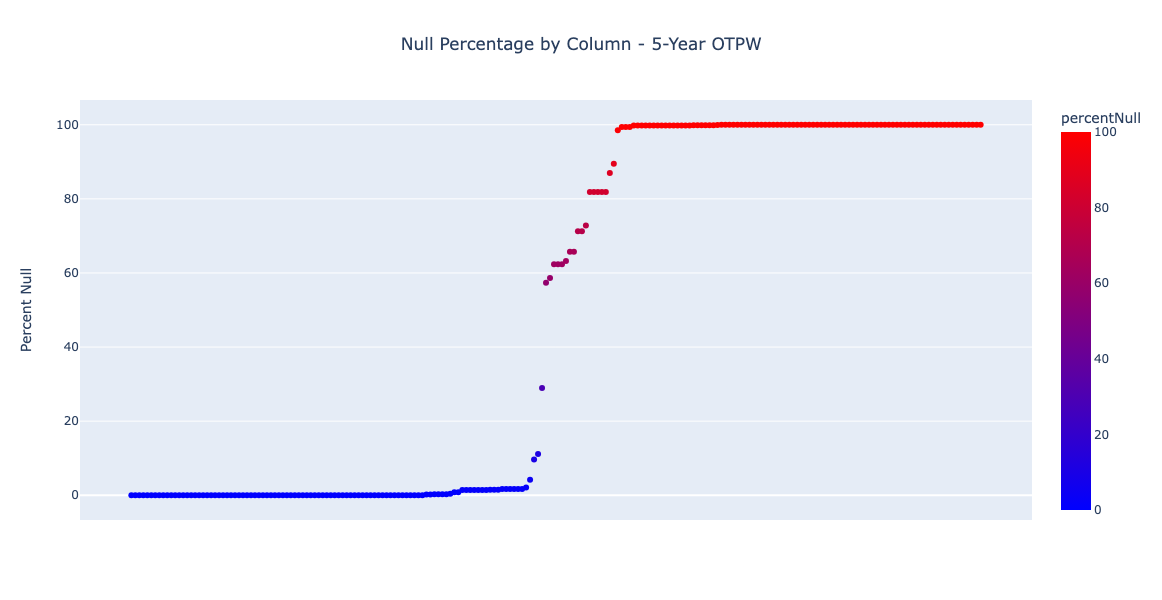

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/missing_values.png'
display(Image(filename=image_path))

However, in contrast to its companion dataset, missing values in the ATP data were easier to manage and recover. For instance, flight records with missing values in the column "DEP_DEL15", which denoted whether a flight was delayed or not, were flights that were canceled. For the purposes of this project, they were retroactively marked as "delayed" or "1" in the final joined dataset, simply because cancelled flights also cost airlines, airports, and passengers precious time and resources. Similar solutions were applied to all delay-related and arrival-related columns. 

Below is a figure showing an exact match between the number of values missing from the "DEP_DEL15" column and those flights marked as cancelled, indicating that this was an appropriate decision. Please note the following when interpreting the graph:

*DEP_DEL15 is a flag indicating whether a flight was delayed for more than 15 minutes. A "1" indicates a delay, while a "0" indicates a non-delay.

**CANCELLED is a flag indicating whether a flight was canceled. A "1" indicates a cancellation, while a "0" indicates a successful departure.

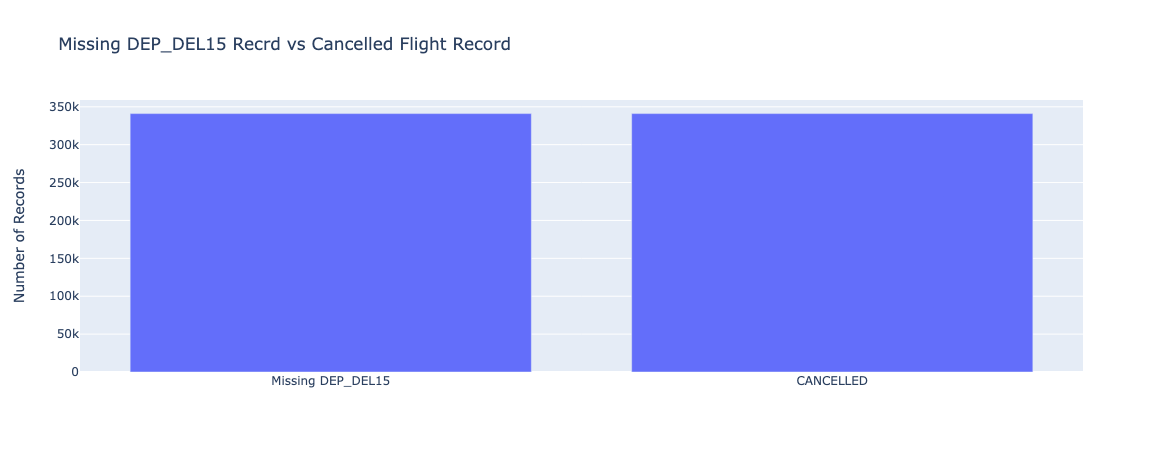

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/label_missing_cancelled.png'
display(Image(filename=image_path))

##Numeric Feature Selection

For the model building itself, it became clear after the Phase 1 analysis that to enjoy better results from the model predictions, a limited number of important "features", or properties of the dataset (in this case specific columns), would need to be selected from the dataset as a whole. To this end, Ridge Regression, a technique that specifically corrects for co-variables that might conflate each other during analysis, was employed to select the most impactful numerical variables. Of these results, the best five were selected based off of their "Ridge coefficients", with the larger the number indicating a higher impact. 

A table of these variables and their specific coefficients can be found below, and the rest of this section will explore those variables in more detail. If feature selection is not of interest at the present, please use the sidebar of this notebook to skip ahead to the section labelled "Neural Network". 


| Feature   | Coefficient |
|--------|-------|
| HourlyRelativeHumidity     | 0.0209    |
| HourlyDryBulbTemperature    | -0.0094     |
| HourlyWindSpeed | 0.0076   |
| HourlyWetBulbTemperature | -0.0072    |
| HourlyAltimeterSetting | -0.0070 |

####Hourly Relative Humidty
Hourly Relative Humdity is the amount of water vapor in the air, reported in percentage units.

When this variable was grouped based on the values contained in the delayed/undelayed ("DEP_DEL15") column, distributions were fairly similar between flights that were delayed for more than 15 minutes and flights that were not. Nonetheless, there was a small difference when the relative humidity was reported at >70%, with more flights being delayed for 15+ minutes past that point. 

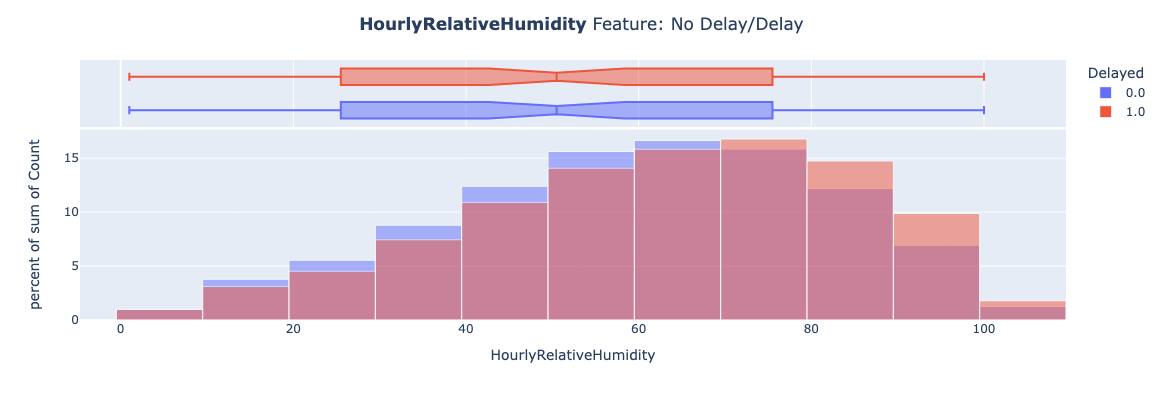

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/HourlyHumidity.png'
display(Image(filename=image_path))

####Hourly Dry Bulb Temperature
Hourly Dry Bulb Temperature is the air temperature, reported in degrees Celsius and converted to degrees Fahrenheit.

When we grouped the HourlyDryBulbTemperature variable based on the delayed/undelayed ("DEP_DEL15") column, distributions were nearly the same between flights that were delayed for more than 15 minutes and flights that were not. No real differences were observed throughout the entirety of the comparison, though it did appear that there were slightly more delays in very cold and very hot weather.

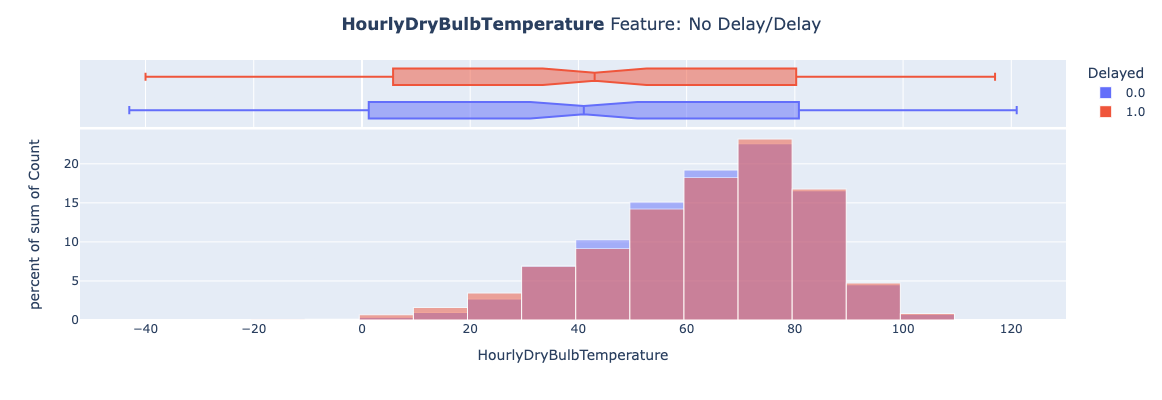

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/HourlyDryBulb.png'
display(Image(filename=image_path))

%md
####Hourly Wind Speed
Hourly Wind Speed is the speed of the wind, reported in meters per second.

When the HourlyWindSpeed variable was grouped based on the values in the delayed/undelayed ("DEP_DEL15") column, distributions were nearly the same between flights that were delayed for more than 15 minutes and flights that were not. However, it was apparent that wind speed did seem to affect whether a 15+ minute delay occurred ever so slightly.

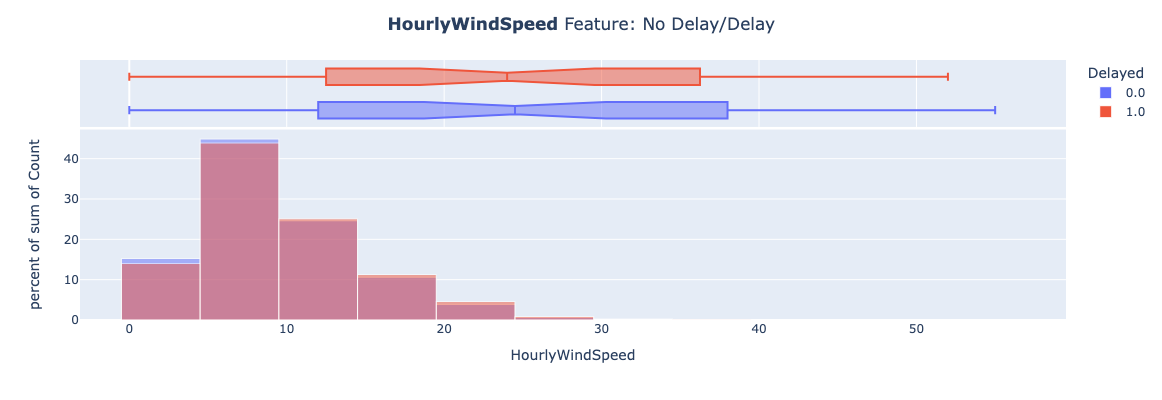

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/HourlyWindSpeed.png'
display(Image(filename=image_path))

####Hourly Wet Bulb Temperature
Hourly Wet Bulb Temperature is the temperature a parcel of air would have if cooled adiabatically to saturation, reported in degrees Celsius and converted to degrees Fahrenheit.

When the HourlyWetBulbTemperature was grouped based on the values in the delayed/undelayed ("DEP_DEL15") column, distributions were somewhat different between flights that were delayed for more than 15 minutes and flights that were not. More flights with a delay of 15+ minutes were observed alongside in low ( < 30) and high ( > 70) HourlyWetBulbTemperature.

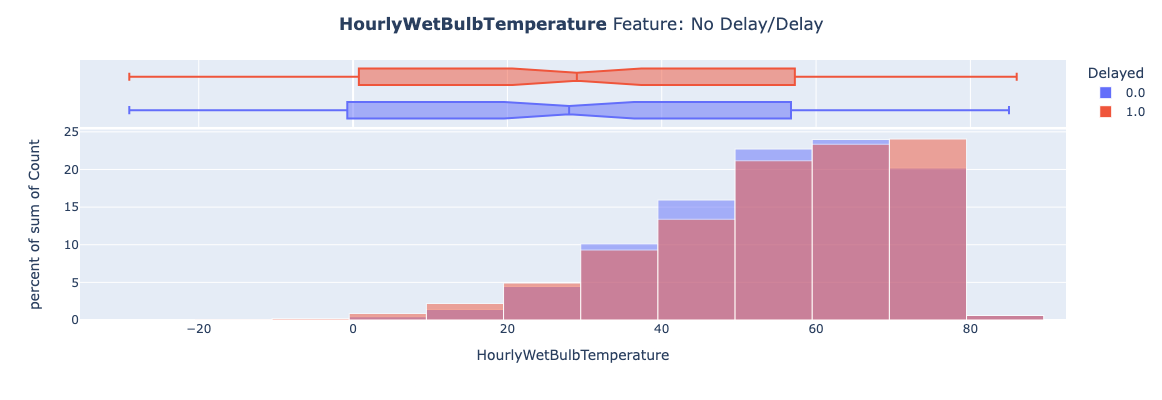

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/HourlyWetBulb.png'
display(Image(filename=image_path))

####Hourly Altimeter Setting
The Hourly Altimeter Setting is the atmospheric pressure adjusted to mean sea level, reported in inches of mercury or hectopascals.

When the HourlyAltimeterSetting variable was grouped based on the values in the delayed/undelayed ("DEP_DEL15") column, there were clear differences between flights that experienced 15+ minute delays and flights that did not, in that it appeared that many flights scheduled to depart while the altimeter reported less than 30 hectopascals experienced delays, while flights that did not fall within this range seemingly did not.

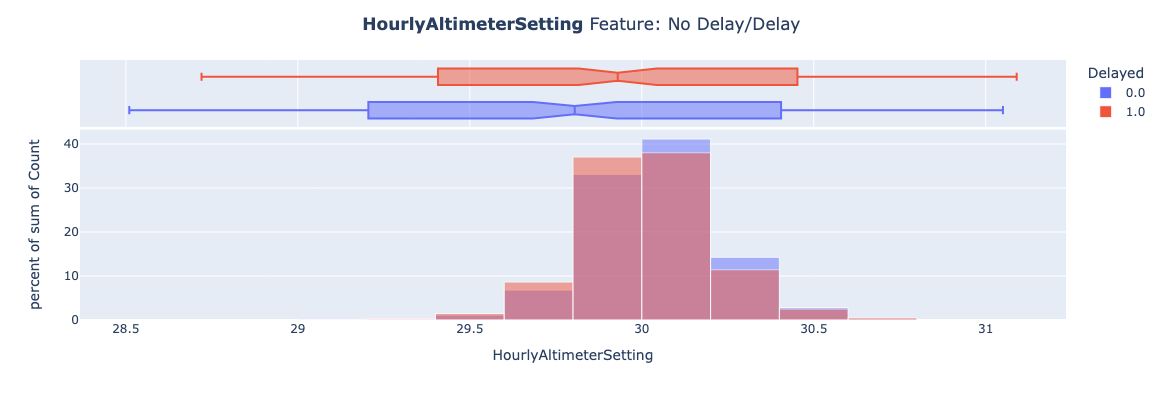

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/HourlyAltimeter.png'
display(Image(filename=image_path))

####Pagerank
Finally, the Pagerank value of an airport is the chance that the random flight would depart from it.

Pagerank values were calculated using the column 'ORIGIN", or the departing airport of a flight, and a weighted graph was created connecting all outgoing airports to any incoming airports. The weights for each connection, or "edge", were calculated via the number of flights that departed from airport A and were scheduled to arrive at airport B. The weighted pagerank value for each "edge" was then calculated using Python's NetworkX library, which contains functions specifically geared towards enabling automated calculations for these sorts of problems.

Although the graph below did not show significant differences in PageRank values between the two categories, this graph feature was still implemented as an experiment.

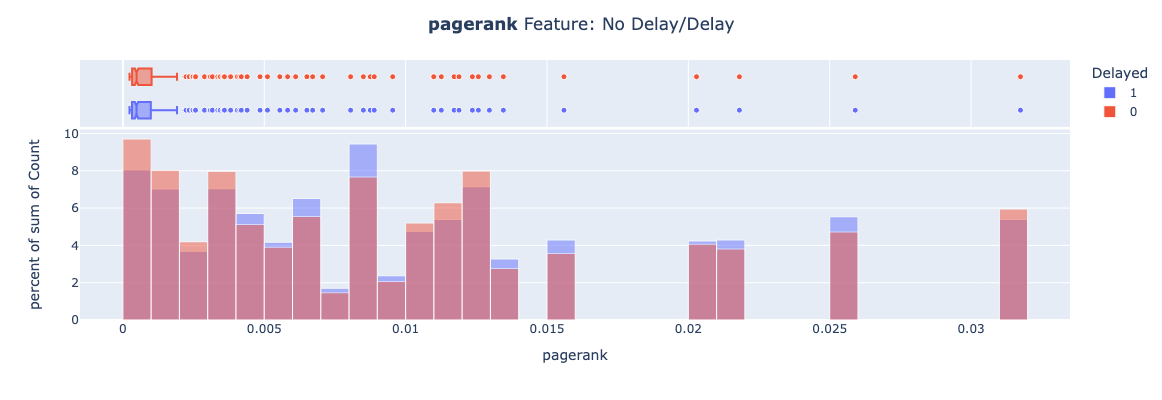

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/pagerank.png'
display(Image(filename=image_path))

##Categorical Feature Selection

####Flight Delays per Departure Airport per Month

One important question when analyzing the data was how much each airport contributed to the total number of delays, and whether these delays had any seasonal trends. As is evident in the graph below, each airport had its own seasonality in the number of flights that experienced delays over 15 minutes. For example, each airport seems to have spikes in delays during January and June-July of each year, possibly due to some combination of weather issues and travels urges due to holidays. 

Thus, the departure airport ID ("Station") and the month the flight occurred in ("Month") were added as categorical features to the models.

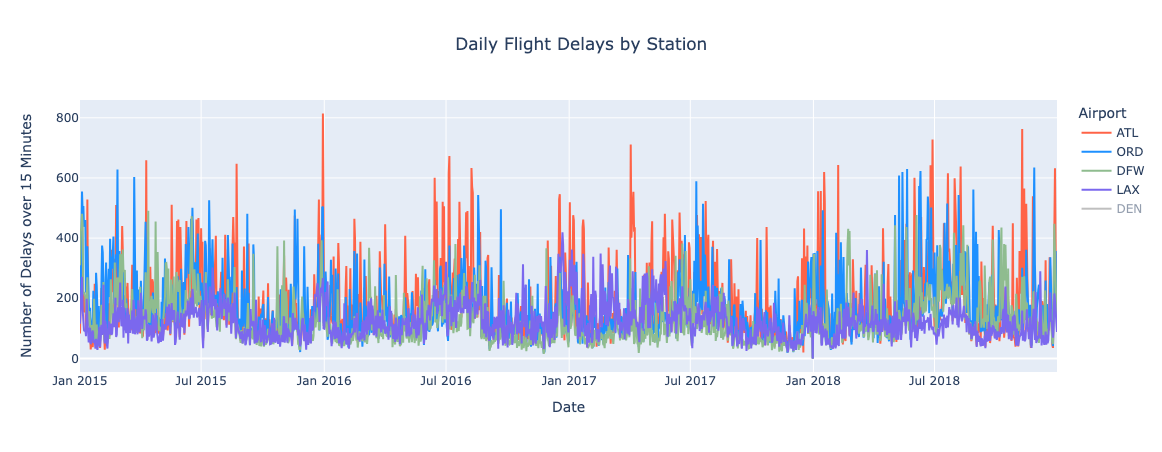

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/delay_airport.png'
display(Image(filename=image_path))

####Flight Delays per Destination Airport per Month
If the departure airport seasonality seemed like it would contribute to the model significantly, what about destination airports? As it turns out, plotting the number of delays grouped by destination airport ID ("DEST_ICAO") revealed that, as one might expect, destination airports also experience similar delay trends throughout the course of each year. Thus, the destination airport ID code was also added as a categorical variable to the model.

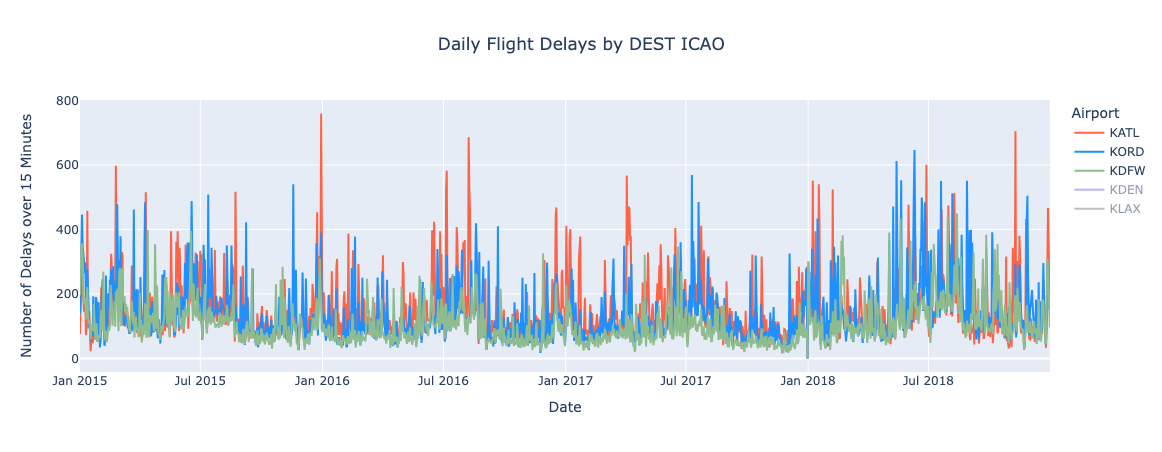

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/dest_delay.png'
display(Image(filename=image_path))

####Day of Week
In that same vein, since it was determined that the month of the year had an impact on the number of delays, the day of the week a flight occurred (DAY_OF_WEEK) was also investigated as having potential importance for the models. As shown in the graph below, there was a periodic trend in flight traffic, in that Mondays and Fridays had many more flights than other days of the week. Thus, day of the week was also added to the model as a categorical variable.

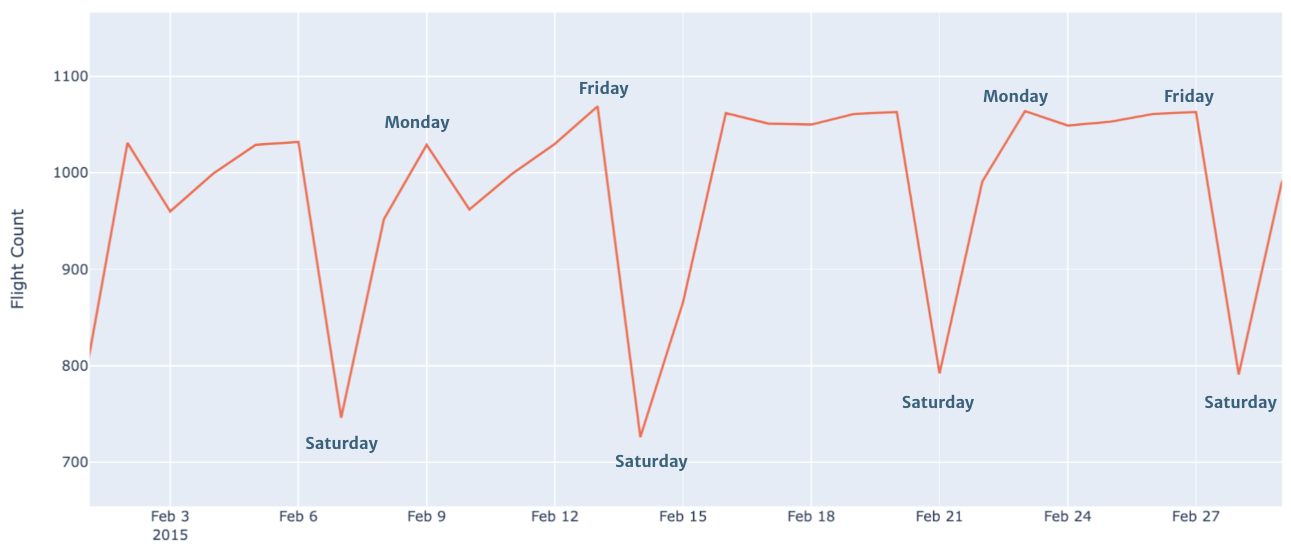

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/day_of_week.png'
display(Image(filename=image_path))

####Time of Day
Bringing home the list of specific time-related categorical variables, we have the time a flight departed ("time_of_day"). The first graph below indicates that the number of flights with delays over fifteen minutes increases as noon and evening approach.

Based on this trend, flights were grouped into three time "buckets": morning, afternoon, and evening, with each flight record assigned to its corresponding bucket based on its departure time. As shown in the second graph, the afternoon and the evening had significantly more flights with delays over 15 minutes compared to the morning.

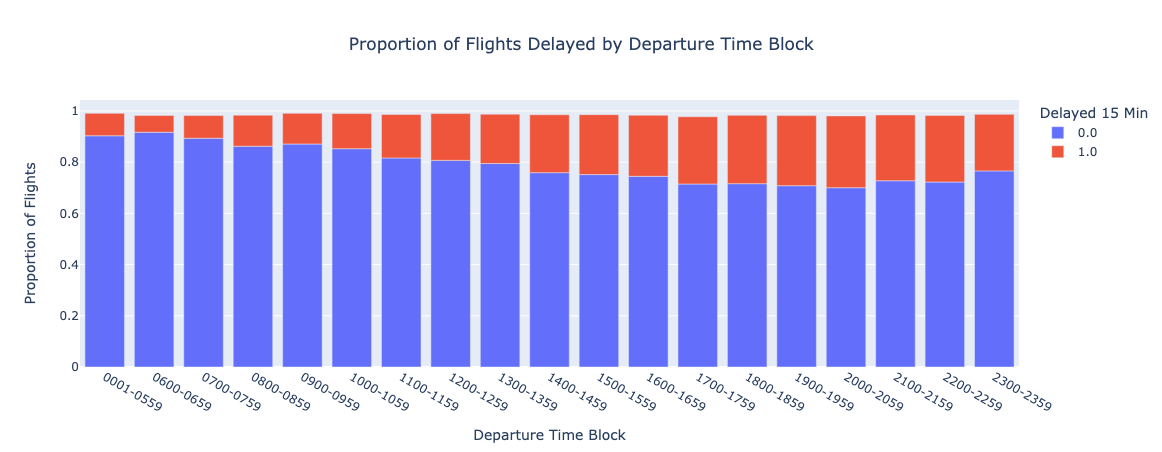

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/time_of_day.png'
display(Image(filename=image_path))

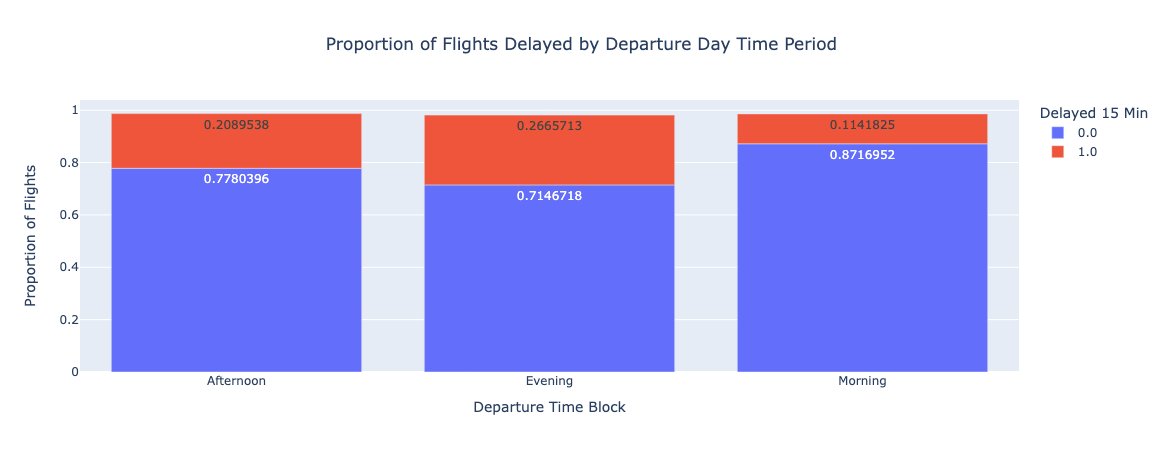

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/time_bucket.png'
display(Image(filename=image_path))

####Holiday Window
One experimental categorical feature included in the final models but not originally present in the dataset was the "Holiday Window", which was a flag indicating whether a specific flight date was within +- 2 days window of any federal holidays. This was considered important because it's well known in the airline industry that holidays, major sporting events, and school breaks all come with an increased amount of air travel, thus increasing the chances a delay would happen.

This is highlighted in the graph below, wherein the red and blue highlighted areas in the graph below represent each federal holiday with a window of two days before and after each one. It can be seen very clearly that these windows captured many spikes in 15+ minute delays, thus confirming the "Holiday Window" hypothesis.

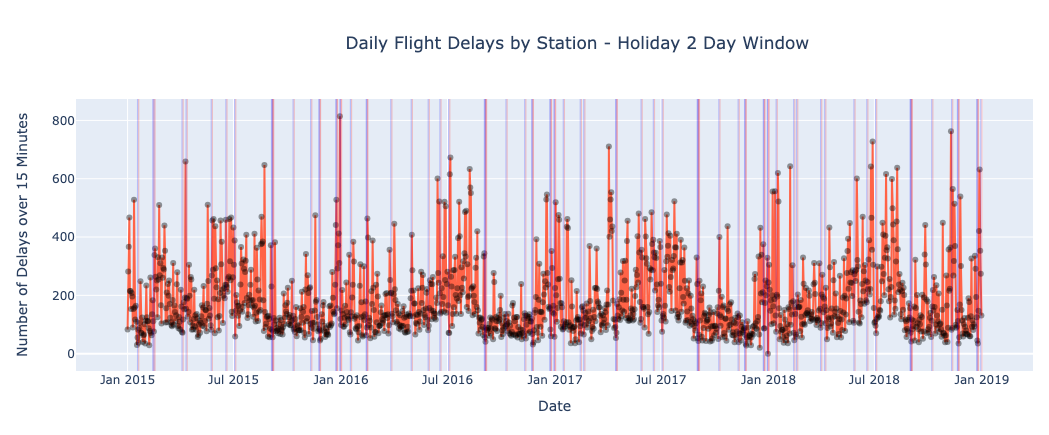

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/holiday_window.png'
display(Image(filename=image_path))

####Hourly Pressure Tendency
The HourlyPressureTendency variable represented the tendency of atmospheric pressure, e.g. whether it was rising or falling as compared to the previous measurement when it was recorded. Below is a list of codes assigned to each pressure type as according to the NOAA GSOD's documentation:

| Code | Description                                                                                             | 
|------|---------------------------------------------------------------------------------------------------------|
| 0    | Increasing, then decreasing; atmospheric pressure the same or higher than 3 hours ago                   |
| 1    | Increasing then steady; or increasing, then increasing more slowly; atmospheric pressure now higher than 3 hours ago |
| 2    | Increasing (steadily or unsteadily); atmospheric pressure now higher than 3 hours ago                   |
| 3    | Decreasing or steady, then increasing; or increasing, then increasing more rapidly; atmospheric pressure now higher than 3 hours ago |
| 4    | Steady; atmospheric pressure the same as 3 hours ago                                                    |
| 5    | Decreasing, then increasing; atmospheric pressure the same or lower than 3 hours ago                    |
| 6    | Decreasing, then steady; or decreasing, then decreasing more slowly; atmospheric pressure now lower than 3 hours ago |
| 7    | Decreasing (steadily or unsteadily); atmospheric pressure now lower than 3 hours ago                   |
| 8    | Steady or increasing, then decreasing; or decreasing, then decreasing more rapidly; atmospheric pressure now lower than 3 hours ago |

When plotted, it can clearly be seen that the number of flights with 15+ minute delays differed greatly between pressure tendencies, thus providing important information that needed to be incorporated into the model.

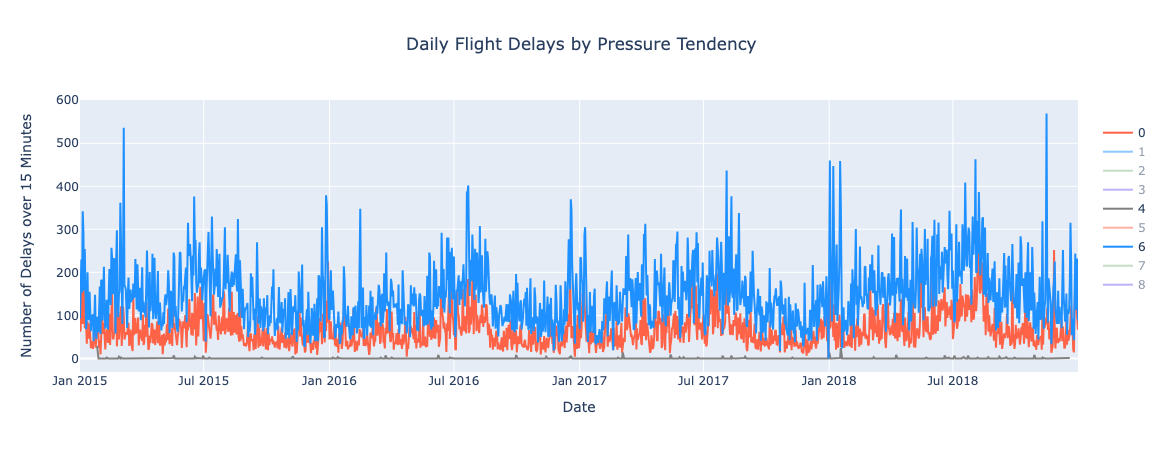

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/pressure_tendency.png'
display(Image(filename=image_path))

####Hourly Wind Direction
Hourly Wind Direction was the direction from which the wind is blowing, measured in degrees (0 to 360)

When plotted, it can clearly be seen that this variable experienced a seasonality trend in both wind direction and the number of flights with delays over 15 minutes. As different wind directions seemed to impact flight delays differently at different times of the year, the variable was incorporated into the model.

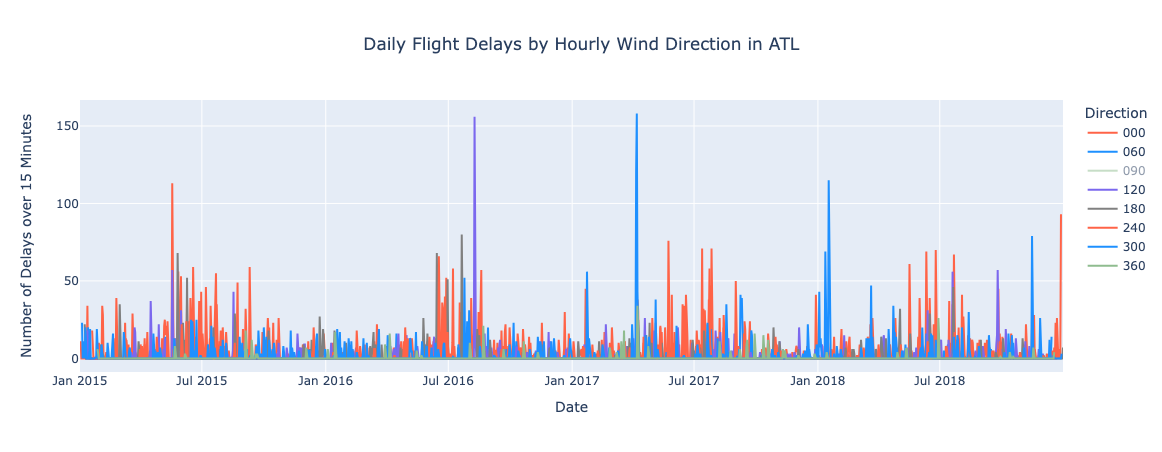

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/wind_direction.png'
display(Image(filename=image_path))

####Hourly Sky Conditions
Finally, the Hourly Sky Condition was the description of how clear the sky waas that day and whether visibility was at all impacted (measured in oktas). Below can be found a table of all of the weather and visibility codes assigned to the data in the NOAA GSOD dataset.

| Code | Description       | Notes                                |
|------|-------------------|--------------------------------------|
| 00   | None              | SKC or CLR                           |
| 01   | One okta          | 1/10 or less but not zero            |
| 02   | Two oktas         | 2/10 - 3/10, or FEW                  |
| 03   | Three oktas       | 4/10                                 |
| 04   | Four oktas        | 5/10, or SCT                         |
| 05   | Five oktas        | 6/10                                 |
| 06   | Six oktas         | 7/10 - 8/10                          |
| 07   | Seven oktas       | 9/10 or more but not 10/10, or BKN   |
| 08   | Eight oktas       | 10/10, or OVC                        |
| 09   | Sky obscured      | Cloud amount cannot be estimated     |
| 10   | Partial Obscuration|                                      |
| 11   | Thin Scattered    |                                      |
| 12   | Scattered         |                                      |
| 13   | Dark Scattered    |                                      |
| 14   | Thin Broken       |                                      |
| 15   | Broken            |                                      |
| 16   | Dark Broken       |                                      |
| 17   | Thin Overcast     |                                      |
| 18   | Overcast          |                                      |
| 19   | Dark overcast     |                                      |
| 99   | Missing           |                                      |

When the "seven oktas of obscuration" condition was plotted, it became clear very quickly that visibility had a very direct impact on the number of flights that experienced a 15+ minute delay for that day. Thus, the one-hot encoded sky condition variables were also added to the model.

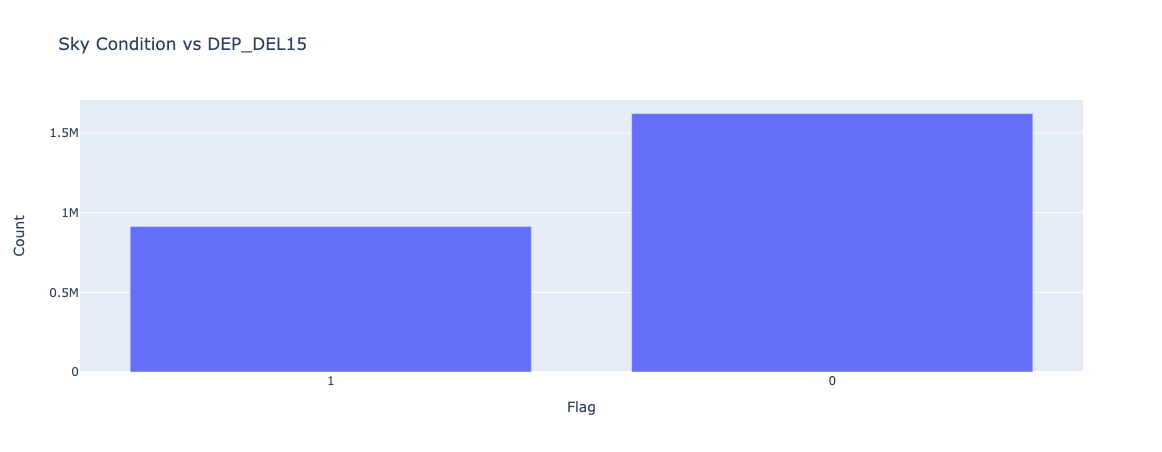

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/sky_condition7.png'
display(Image(filename=image_path))

##Dataset Splitting and Pre-processing
To create the training and testing sets necessary for model development and iterative improvements, the 5-year OTPW dataset was split into train and test sets on the year 2019. This split the total number of records from more than 31.6 million records into 24.2 million train records and 7.3 million test records.

Then, any rows that contained null records for any of the above-described features were dropped records, resulting in ~7 million records left in the training set, ~2 million records in the testing set. 

Both sets were also checked for duplicate records, but as none were found no records were dropped during this step. 

As per the results of the Phase 1 and 2 experimentation determining that the models performed better with a class-balanced training set, undersampling was implemented to balance the data in the training set. However, the test set remained untouched, resulting in ~2.5 million records left in the training set and ~2 million records in the test set.

Please note that all of the segmented datasets (3 months, 1 year, 3 years, and 5 years) underwent a similar cleaning process as described here, but for brevity only the 5-year dataset was used here for example purposes.

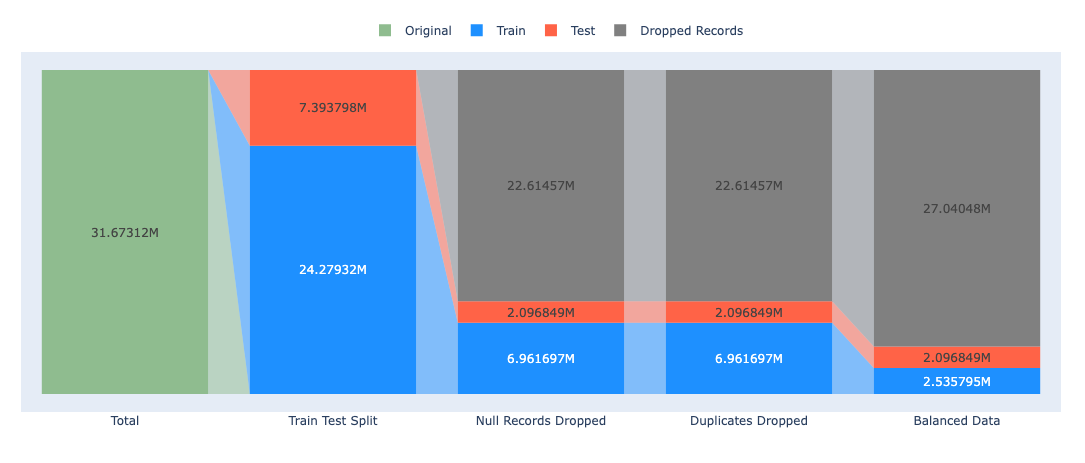

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/ihsiukao@berkeley.edu/missing_plot.png'
display(Image(filename=image_path))

#Leakage


Data leakage is a significant concern in machine learning, especially in time series analysis like this. Leakage occurs when information that should not be a part of the training data finds its way into training data and influences the models ability to make accurate predictions in the absense of that additional information. A common place for this to happen is during data preparation, particularly when splitting data into training and testing sets. In time series analysis it is inappropriate to randomly shuffle and split the data as is commonly practiced. Typically, a random data split of 80% training data and 20% testing data is used, but this method can lead to the contamination of the training set, introducing information that should not be available at the training stage.

To address this problem, it is critical to split time series data chronologically, maintaining the sequence of events. A model trained on chronologically split data will more accurately reflect its future performance on unseen data. If the dataset is not divided properly, the model might show high accuracy on the test set due to the leakage of future information but will likely underperform with new data in a real-world scenario.

In all aspects, this project strictly adheres to the best practices of machine learning on time-series data. The data was chronologically divided into training and testing sets prior to any data processing, ensuring no temporal information contamination occurred. All feature engineering was conducted post-split, effectively preventing any leakage from the test set into the training data. This approach was maintained throughout exploratory data analysis, feature engineering, and further data processing stages. Additionally, the normalization of numerical values was strictly based on the distribution of the training data alone, with the testing data subsequently scaled using the same parameters to maintain consistency and prevent bias. 3-fold blocking cross-validation was also implemented across all models, ensuring no data leakage occurred at the validation stage. Finally, the test set was kept entirely separate from the modeling pipeline, serving as a truly independent measure of the model’s ability to generalize to new, unseen data. With these steps taken you can feel confident in the processes performed and the results obtained. 


#Modeling Pipelines

##Pipeline Visualization

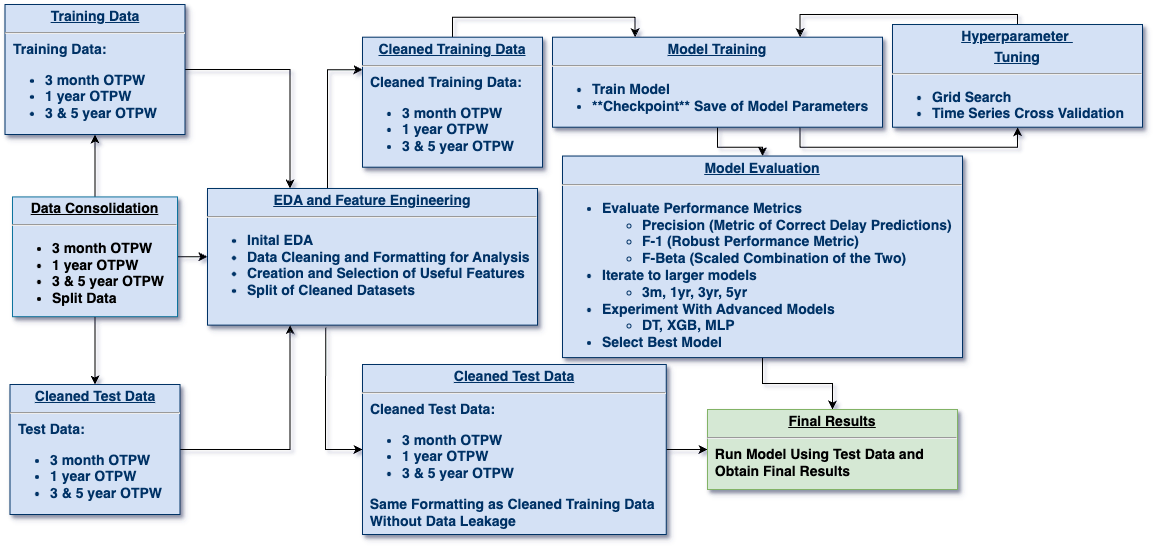

In [0]:
# from IPython.display import display, Image

# image_path = ''
# display(Image(filename=image_path))

##Pipeline Summary

To ensure the best possible iteration during model creation, the ATP and GSOD datasets were joined into one (the OTPW set) and then split into subsets spanning three months, one year, three years, and five years. The training and testing datasets were split at the beginning of the pipeline to prevent data leakage, and training sets always occurred before test sets in the split without time overlap. For example, the 1-year dataset contains the first three quarters of 2015 as training data and the last quarter of the year serves as test data. The data split was followed by an exploratory data analysis (EDA) and cleaning stage, which ensured any missing or duplicate values were dropped and that text columns were parsed into categorical features. Any new features were also created during this phase.


The next step, feature selection, was performed iteratively on the train and test data, and various possible features were kept or dropped based on the EDA, Lasso, and Ridge Regression results. With both datasets consisting of relevant features, we then balanced via naive undersampling, and Z-scaled the training data (as Logistic Regression assumes linear data). Z-scaling was also performed on the numeric test data, though applied so that the scaling parameters were derived from the training data. All categorical variables for all datasets were then one-hot encoded, vectorized, and saved for later use. In the case of modeling with Decision Tree Classifiers or XGBoost a Z-scaling of numeric features was not necessary.


Finally, a 3-fold Blocking Cross Validation grid search was used during the hyperparameter tuning phase to find and optimize the best model. Our grid search itself used Spark's Binary Classification Evaluator to assess model efficacy based on the model's ROC curves. The model with the best hyperparameter values was then selected and used to evaluate the withheld and cleaned test data. Final results were reported using two metrics: ROC curves and F-0.5 scores. The thresholding of the ROC curves provided a more holistic view of a model's performance than most other metrics, which made it optimal for assessing model performance, and the F-0.5 score weighted precision with double the importance of recall, thus enabling finer control of false-positives. This particular implementation was chosen because a false-positive in detecting a flight delay could cause passengers to miss their flight altogether, and would likely result in more customer dissatisfaction than a regular delay would have normally caused.


#Results and Discussion of Results

##Input Features

A total of 18 features were implemented into the model; 6 numerical and 12 categorical. The summary table below lists the variable names, their types, and their corresponding counts, and descriptions and analyses of these variables can be found above in the "Data Engineering and Feature Selection" section of this report.

| Feature | Type | Count |
|------|------|------|
| HourlyRelativeHumidity    | Numerical  | 1 |
| HourlyDryBulbTemperature    | Numerical  | 1 |
| HourlyWindSpeed    | Numerical | 1 |
| HourlyWetBulbTemperature | Numerical  | 1 |
| HourlyAltimeterSetting | Numerical | 1 |
| Pagerank    | Numerical  | 1 |
| HourlyPressureTendency | Categorical | 9 |
| HourlyWindDirection    | Categorical | 152 |
| HourlySkyConditions    | Categorical | 40 |
| HourlyWeatherType    | Categorical | 40 |
| DAY_OF_WEEK | Categorical | 7 |
| MONTH | Categorical | 12 |
| time_of_day_category | Categorical | 3 |
| origin_icao | Categorical | 330 |
| ORIGIN_STATE_ABR | Categorical | 51 |
| dest_icao | Categorical | 330 |
| DEST_STATE_ABR | Categorical | 51 |
| in_holiday_window | Categorical | 2 |

##General Metrics Formula

All models were reported using four metrics: precision (measures the number of false positives), recall (measures the number of false negatives), F-1 score (averages precision and recall evenly), F-0.5 score (weights precision 2x as highly as recall), and loss (the error margin between a model's prediction and the actual target value). These particular metrics were chosen to emphasize precision over recall, as in the worst case scenario a false positive (delay detected when actually undelayed) would likely cause more chaos and loss than a false negative (passenger misses their flight because a delay was falsely detected vs. having to wait a bit longer because a delay went undetected). 

The formulas for these metrics can be found below.

\\(Precision = \frac{True Positives}{True Positives + False Positives}\\)

\\(Recall = \frac{True Positives}{True Positives + False Negatives}\\)

\\(F(1) = 2 * \frac{Precision × Recall}{Precision + Recall}\\)

\\(F(0.5) = (1 + 0.5^2) * \frac{Precision \times Recall}{(0.5^2 \cdot Precision) + Recall}\\)

\\({Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]\\)

##Experimental Models and Results
###Total Number of Experiments Conducted: 40

###Baseline Model Experiments - Logistic Regression

In this experiment, we aimed to find out 
1) Whether the training dataset should be balanced. 
2) The effect of implementing feature selection
3) The effect of using cross-validation. The logistic regression model was chosen in this scenario as it provided a simple, easily-explainable baseline for evaluating other models.

**Result:** the Logistic Regression (LR) model worked best with a balanced dataset and with feature selection- the unbalanced dataset's results initially indicated higher precision, but resulted in the model just guessing which samples were delayed or not in line with the 3:1 ratio of undelayed/delayed present in the dataset itself. The LR model with balancing performed well overall, but the model with feature selection performed well enough that the target metric (F-0.5) scored ~52-56% on average, with the model's ROC curves confirming this finding. Curiously, though, the Area Under the curve (AUC) measured for this model was 0.667 and 0.658 for training and testing respectively, indicating that these results may have been stronger than initially thought. 

| Experiment | Precision | Recall | F-1 Score | Average Runtime |
|------|------|------|------|------|
| 3 Month Data without Feature Selection Train | 0.6277  | 0.6159 | 0.6218 | 2 Minutes |
| 3 Month Data without Feature Selection Test | 0.2966  | 0.3603 | 0.3253 | 12 Seconds |
| 3 Month Data with Feature Selection Train | 0.6271  | 0.6083 | 0.6176 | 1 Minute |
| 3 Month Data with Feature Selection Test | 0.2957  | 0.3602 | 0.3248 | 1 Minute |
| 1 Year Balanced Data without Feature Selection Train | 0.5972  | 0.6059 | 0.6015 | 4 Minutes |
| 1 Year Balanced Data without Feature Selection Test | 0.1938  | 0.6878 | 0.3024| 1 Minute |
| 1 Year Balanced Data without Feature Selection Cross-Validation Train | 0.5969  | 0.6070 | 0.6019 | 50 Minutes |
| 1 Year Balanced Data without Feature Selection Cross-Validation Test | 0.1944  | 0.6806 | 0.3024 | 1 Minute |
| 1 Year Balanced Data with Feature Selection Train | 0.5961  | 0.6085 | 0.6022 | 5 Minutes |
| 1 Year Balanced Data with Feature Selection Test | 0.1931  | 0.6896 | 0.3017 | 1 Minute |
| 1 Year Balanced Data with Feature Selection Cross-Validation Train | 0.5512  | 0.4665 | 0.5053 | 37 Minutes |
| 1 Year Balanced Data with Feature Selection Cross-Validation Test | 0.1862  | 0.5706 | 0.2808 | 1 Minutes |
| 1 Year Unbalanced Data without Feature Selection Train | 0.6049  | 0.0099 | 0.0194 | 4 Minutes |
| 1 Year Unbalanced Data without Feature Selection Test | 0.5645  | 0.0104 | 0.0204 | 1 Minute |
| 1 Year Unbalanced Data without Feature Selection Cross-Validation Train | 0.6150  | 0.0088 | 0.0174 | 57 Minutes |
| 1 Year Unbalanced Data without Feature Selection Cross-Validation Test | 0.5991  | 0.0083 | 0.0164 | 1 Minute |
| 1 Year Unbalanced Data with Feature Selection Train | 0.6078  | 0.0099 | 0.0194 | 3 Minutes |
| 1 Year Unbalanced Data with Feature Selection Test | 0.5803  | 0.0105 | 0.0207 | 1 Minute |
| 1 Year Unbalanced Data with Feature Selection Cross-Validation Train | 0.5630  | 0.0066 | 0.0130 | 41 Minutes |
| 1 Year Unbalanced Data with Feature Selection Cross-Validation Train | 0.4836 | 0.0088 | 0.0088 | 58 Seconds |
| 5 Years Balanced Data with Feature Selection Train | 0.6188  | 0.6398 | 0.6229 (F0.5) | 3 Minutes |
| 5 Years Balanced Data with Feature Selection Test | 0.2715  | 0.6308 | 0.3064 (F0.5) | 1 Minute |
| 5 Years Balanced Data with Feature Selection Time Series Cross-Validation Train | 0.6133  | 0.6410 | 0.6186 (F0.5) | 2 Hours |
| 5 Years Unbalanced Data with Feature Selection Time Series Cross-Validation Train | 0.2667 | 0.6350 | 0.3017 (F0.5) | 2 Minutes |

###Experiments - Decision Tree and XGBoost

Decision Tree Gini Impurity: \\(G = 1 - \sum_{i=1}^k p_i^2\\)

XGBoost Logistic Loss: \\((\theta) = - y \log(\sigma(\theta)) + (1 - y) \log(1 - \sigma(\theta))\\)


Result: both the decision tree and XGBoost did not perform better than our baseline logistic regression model. Additionally, XGBoost scaled poorly with the 5-years dataset, and thus the XGBoost testing was left unfinished due to frequent crashes.

| Experiment | Precision | Recall | F0.5 Score | Time |
|------|------|------|------|------|
| 5 Years Balanced Data with Categorical Features on Decision Tree Train | 0.5751  | 0.7588 | 0.6043 | 27 Minutes |
| 5 Years Balanced Data with Categorical Features on Decision Tree Test | 0.2388  | 0.7457 | 0.2763 | 4 Minutes |
| 5 Years Balanced Data with Categorical Features on Decision Tree Time Series Cross-Validation Train | 0.5752 | 0.7489 | 0.6032 | 58 Minutes |
| 5 Years Balanced Data with Categorical Features on Decision Tree Time Series Cross-Validation Test | 0.2389  | 0.7345 | 0.2762 | 3 Minutes |
| 3 Years Balanced Data with Feature Selection on XGBoost Train | 0.6114  | 0.6654 | 0.6214 | 56 Minutes |
| 3 Years Balanced Data with Feature Selection on XGBoost Test | 0.2587  | 0.6173 | 0.2927 | 3 Minutes |

###Advanced Model Experiments - Multilayer Perceptron (MLP)

The Multilayer Perceptron (MLP) was chosen as an advanced model based off the results of the Logistic Regression model- as the LR model performed well overall but indicated signs of overfitting, the MLP was chosen to test whether the overfitting was caused by nonlinearities in the data. Thus, two different MLPs were trained, both with different core architectures. 

MLP 1 was structured as follows:

*MLP Model 1 Layers: 1024 - sigmoid - 14 - sigmoid - 20 - sigmoid - 14 - sigmoid - 2 - softmax*

While MLP2 was structured as so: 

*MLP Model 2 Layers: 1024 - sigmoid - 2048 - sigmoid - 1024 - sigmoid - 2 - softmax*

Note that the PySpark MultilayerPerceptronClassifier function adds a sigmoid activation function (useful for binary classification problems like this one) to each layer and a softmax activation function (needed to get the class probabilities) to the output layer, hence their additions into the architectures shown here. Finally, for the curious, the formulas for the Sigmoid and Softmax activation functions are shown below. 

*Sigmoid Activation Function*: \\(sigma(x) = \frac{1}{1 + e^{-x}}\\)

*Softmax Activation Function*: \\(sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}\\)


Result: The first MLP model performed better than the baseline logistic regression model by between 3-5% on average, and had a better performance without using time series cross-validation. Nonetheless, all results showed signs of overfitting, where train results were much better than test results in precision and F(0.5) score. Much like with the LR model, the AUC measured for this model was approximately 0.64 and 0.65 on average for training and testing respectively, indicating that these results may have been stronger than initially thought.

| Experiment | Precision | Recall | F0.5 Score | Average Runtime |
|------|------|------|------|------|
| 3 Month Balanced Data with Feature Selection on MLP model 1 Train | 0.6553  | 0.6206 | 0.6480 | 18 Seconds |
| 3 Month Balanced Data with Feature Selection on MLP model 1 Test | 0.2884  | 0.5419 | 0.3182 | 12 Seconds |
| 1 Year Balanced Data with Feature Selection on MLP model 1 Train | 0.6337 | 0.6217 | 0.6313 | 2 Minutes |
| 1 Year Balanced Data with Feature Selection on MLP model 1 Test | 0.2243  | 0.5865 | 0.2559 | 2 Minutes |
| 3 Years Balanced Data with Feature Selection on MLP model 1 Train | 0.6350 | 0.6047 | 0.6287 | 2 Minutes |
| 3 Years Balanced Data with Feature Selection on MLP model 1 Test | 0.2739  | 0.5896 | 0.3067 | 1 Minute |
| 5 Years Balanced Data with Feature Selection on MLP model 1 Train | 0.6315 | 0.6034 | 0.6257 | 14 Minutes |
| 5 Years Balanced Data with Feature Selection on MLP model 1 Test | 0.2818  | 0.5918 | 0.3148 | 2 Minutes |
| 5 Years Balanced Data with Feature Selection on MLP model 1 Time Series Cross-Validation Train | 0.6011 | 0.6354 | 0.6076 | 4 Hours |
| 5 Years Balanced Data with Feature Selection on MLP model 1 Time Series Cross-Validation Test | 0.2576  | 0.6305 | 0.2921 | 3 Minutes |
| 5 Years Balanced Data with Feature Selection on MLP model 2 Train | 0.6302 | 0.6193 | 0.6280 | 17 Minutes |
| 5 Years Balanced Data with Feature Selection on MLP model 2 Test | 0.2808  | 0.6033 | 0.3144 | 2 Minutes |

# Results and Discussion

Final analysis of the normalized datasets indicated that the Logistic Regression (LR) and the Multilayer Perceptron (MLP) models performed the best out of all four architectures tested for this project. The LR model boasted an ~ 60% success rate with moderate overfitting, while the MLP model performed even better with an ~ 65% success rate, albeit with heavier overfitting. Meanwhile, the Decision Tree algorithm performed fairly well (~ 57%) but scaled less adequately time-wise than the LR and MLP models, and the XGBoost model was unscalable past 3 years of data. 

However, as can be seen in the tables above, the excellent results seen in the LR and MLP models unfortunately were seemingly only present during the training phase, not the test, as the F-0.5 scores dropped drastically after transitioning from the training to the test phases. This is curiously in opposition to the Area Under the Curve (AUC) scores, though, as both the LR and MLP models scored in the 60-70% range (consistent with the training F-0.5 scores) for both phases very consistently. It's hypothesized that this effect may have been due to an improperly calibrated F-beta score, but it could also have been due to the feature selection procedure, as both processes have massive effects on the model's ability to properly interpret results. 

## Gap Analysis on the Multilayer Perceptron

As part of our commitment to enhancing the reliability and accuracy of our flight delay notification system, we conducted an extensive post-mortem gap analysis on our Multilayer Perceptron model. This analysis was critical in understanding instances when our model excelled or underperformed, particularly focusing on the implications of false positives, which are especially significant in our business model.

###Confusion Matrix

**Overview:**
To kick off our analysis, we utilized a confusion matrix to quantify the instances of false positives, false negatives, true positives, and true negatives. This method was instrumental in providing a clear picture of our model’s performance, highlighting areas where the model mistakenly predicted flight delays. Given the potential for false alarms to misinform passengers and possibly leading to them arriving late to their flights, minimizing false positives was a key objective.

**Results:**

By analyzing our confusion matrix we can better understand the performance of our model with respect to different test cases. With approximately 2 million records within our test set we can see that 1.6 million of those records are considered `No Delay` by the true label. Given that we balanced our training our labels by undersampling to the minority class this should not have resulted in a large sway in performance. 

Further analysis reveals that our model resulted in a false alarm 35% of the time when the label was `No Delay` with minimal false delays reported at 8%. It has not escaped our notice that our model is underperforming in key areas related to our high standard of precision imposed by our F-0.5 score. To futher understand why our model was performing in this way we decided to implement decision trees in our next steps.

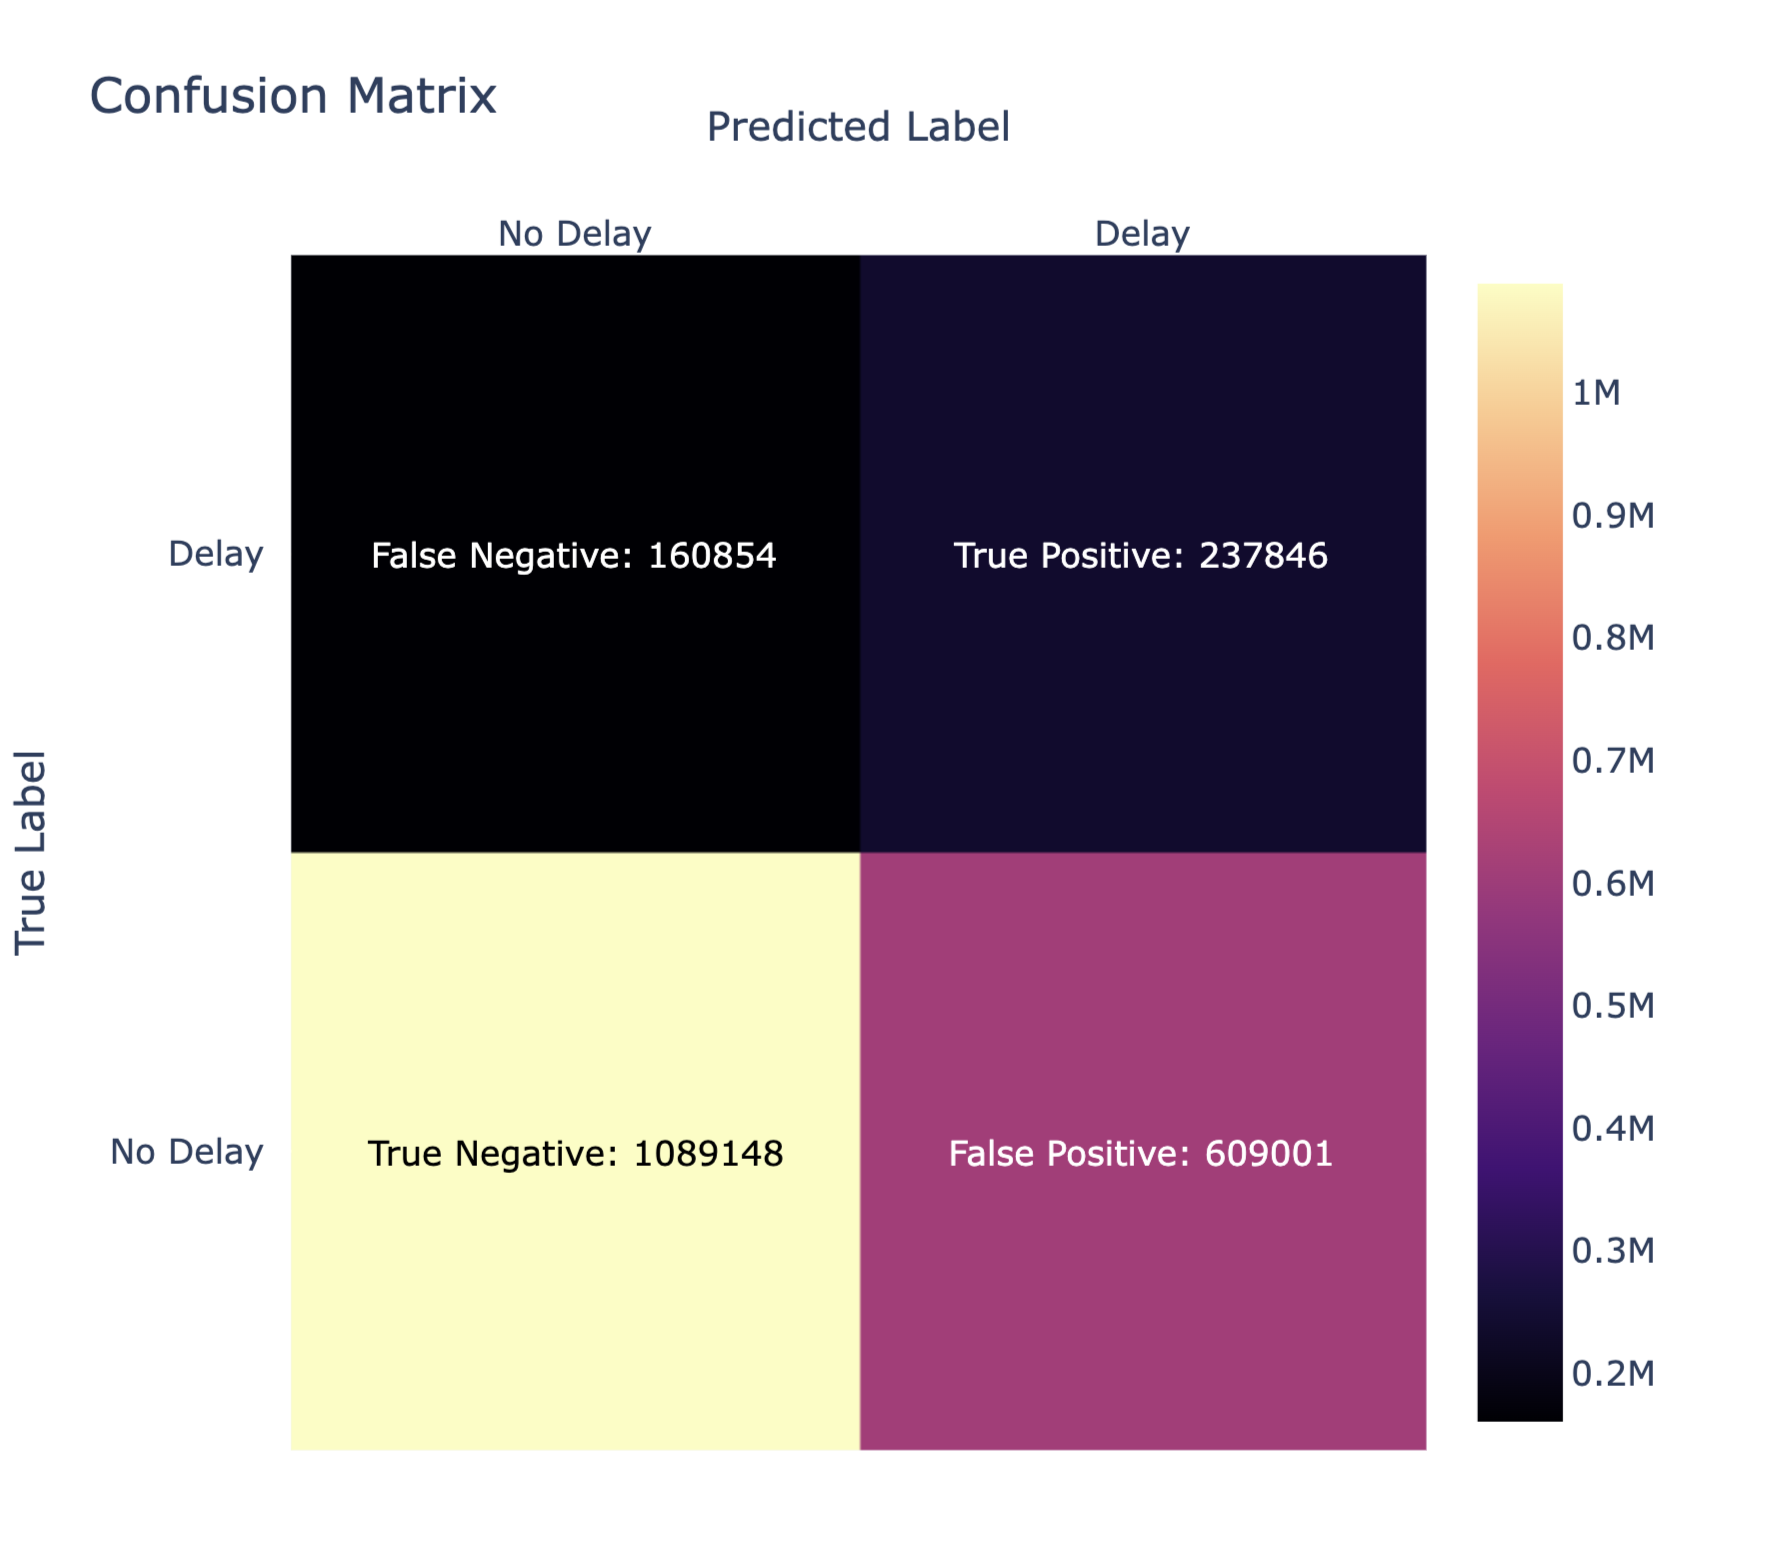

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/nathanarias@berkeley.edu/Screenshot 2024-04-19 at 6.41.29 PM.png'
display(Image(filename=image_path, width=900, height=800))

### Dataset Augmentation
**Enhanced Model Inspection:**
Following the confusion matrix, we delved deeper into the model's decision-making processes. After training and evaluation were completed we augmented our test dataset with two additional columns:

1) Misclassification Indicator:
This column identified whether each prediction was correct or incorrect, enabling us to specifically focus on incorrect predictions.

2) Classification Type: Each instance was categorized as a `False Positive, False Negative, True Positive, or True Negative`. This classification not only facilitated a more targeted analysis but also helped in understanding the context and impact of each type of error.

### Decision Tree Analysis
Utilizing the augmented dataset, we constructed two separate decision trees to analyze:

1) **The Misclassification Decision Tree:** This tree provided insights into the overall decision-making logic used by the model across all instances. It helped us understand the fundamental rules and thresholds that dictated the model’s predictions.
2) **The Error-Specific Decision Tree:** Focused specifically on finer grain labels, this tree aimed to uncover patterns and commonalities in the errors, particularly false positives. This analysis was crucial for identifying specific features or conditions that frequently led to incorrect delay notifications.

Reading a decision tree: When reading a decision tree, the node will provide a condition, such as (time_of_day_category <= 0.5). The left branch represents the  `True` condition and the right branch corresponds to the `False` Condition

         Node
        /     \
      True    False    

#### Misclassification Decision Tree

**Results:**
For interpretablilty and readability, we limited this first misclassification tree to 4 layers but could expand this analysis to further layers to understand more fine grain logic that our model imposes. By looking at the labels within this decision tree we can understand which features were most important within our model in making decisions, listed below they are: 
1) Layer 1: `Time of Day (Morning)`
2) Layer 2: `Weather Type - Rain` , `Month (Jan-April)`
3) Layer 3: `Pagerank`, `Originating Flight State`,  `Time of Day (Afternoon or Evening)`

As we travel down the tree we can see how heavily the `Time of Day` variable is considered within our model, as detailed in our `Categorical Feature Selection` section, morning flights are much less likely to be delayed, it seems our model is using this logic quite heavily. This split, as seen by the color schema, introduces a large dichotomoy of whether a record is misclassified or not. Traversing down the remainder of the tree, we see a variety of other columns that make intuitive sense by looking at rain condidions, how busy the station typically is with pagerank, and state the flight is originating from. Interestingly, in our decision tree we see no instances where we misclassify if the initial node time of day is morning. 

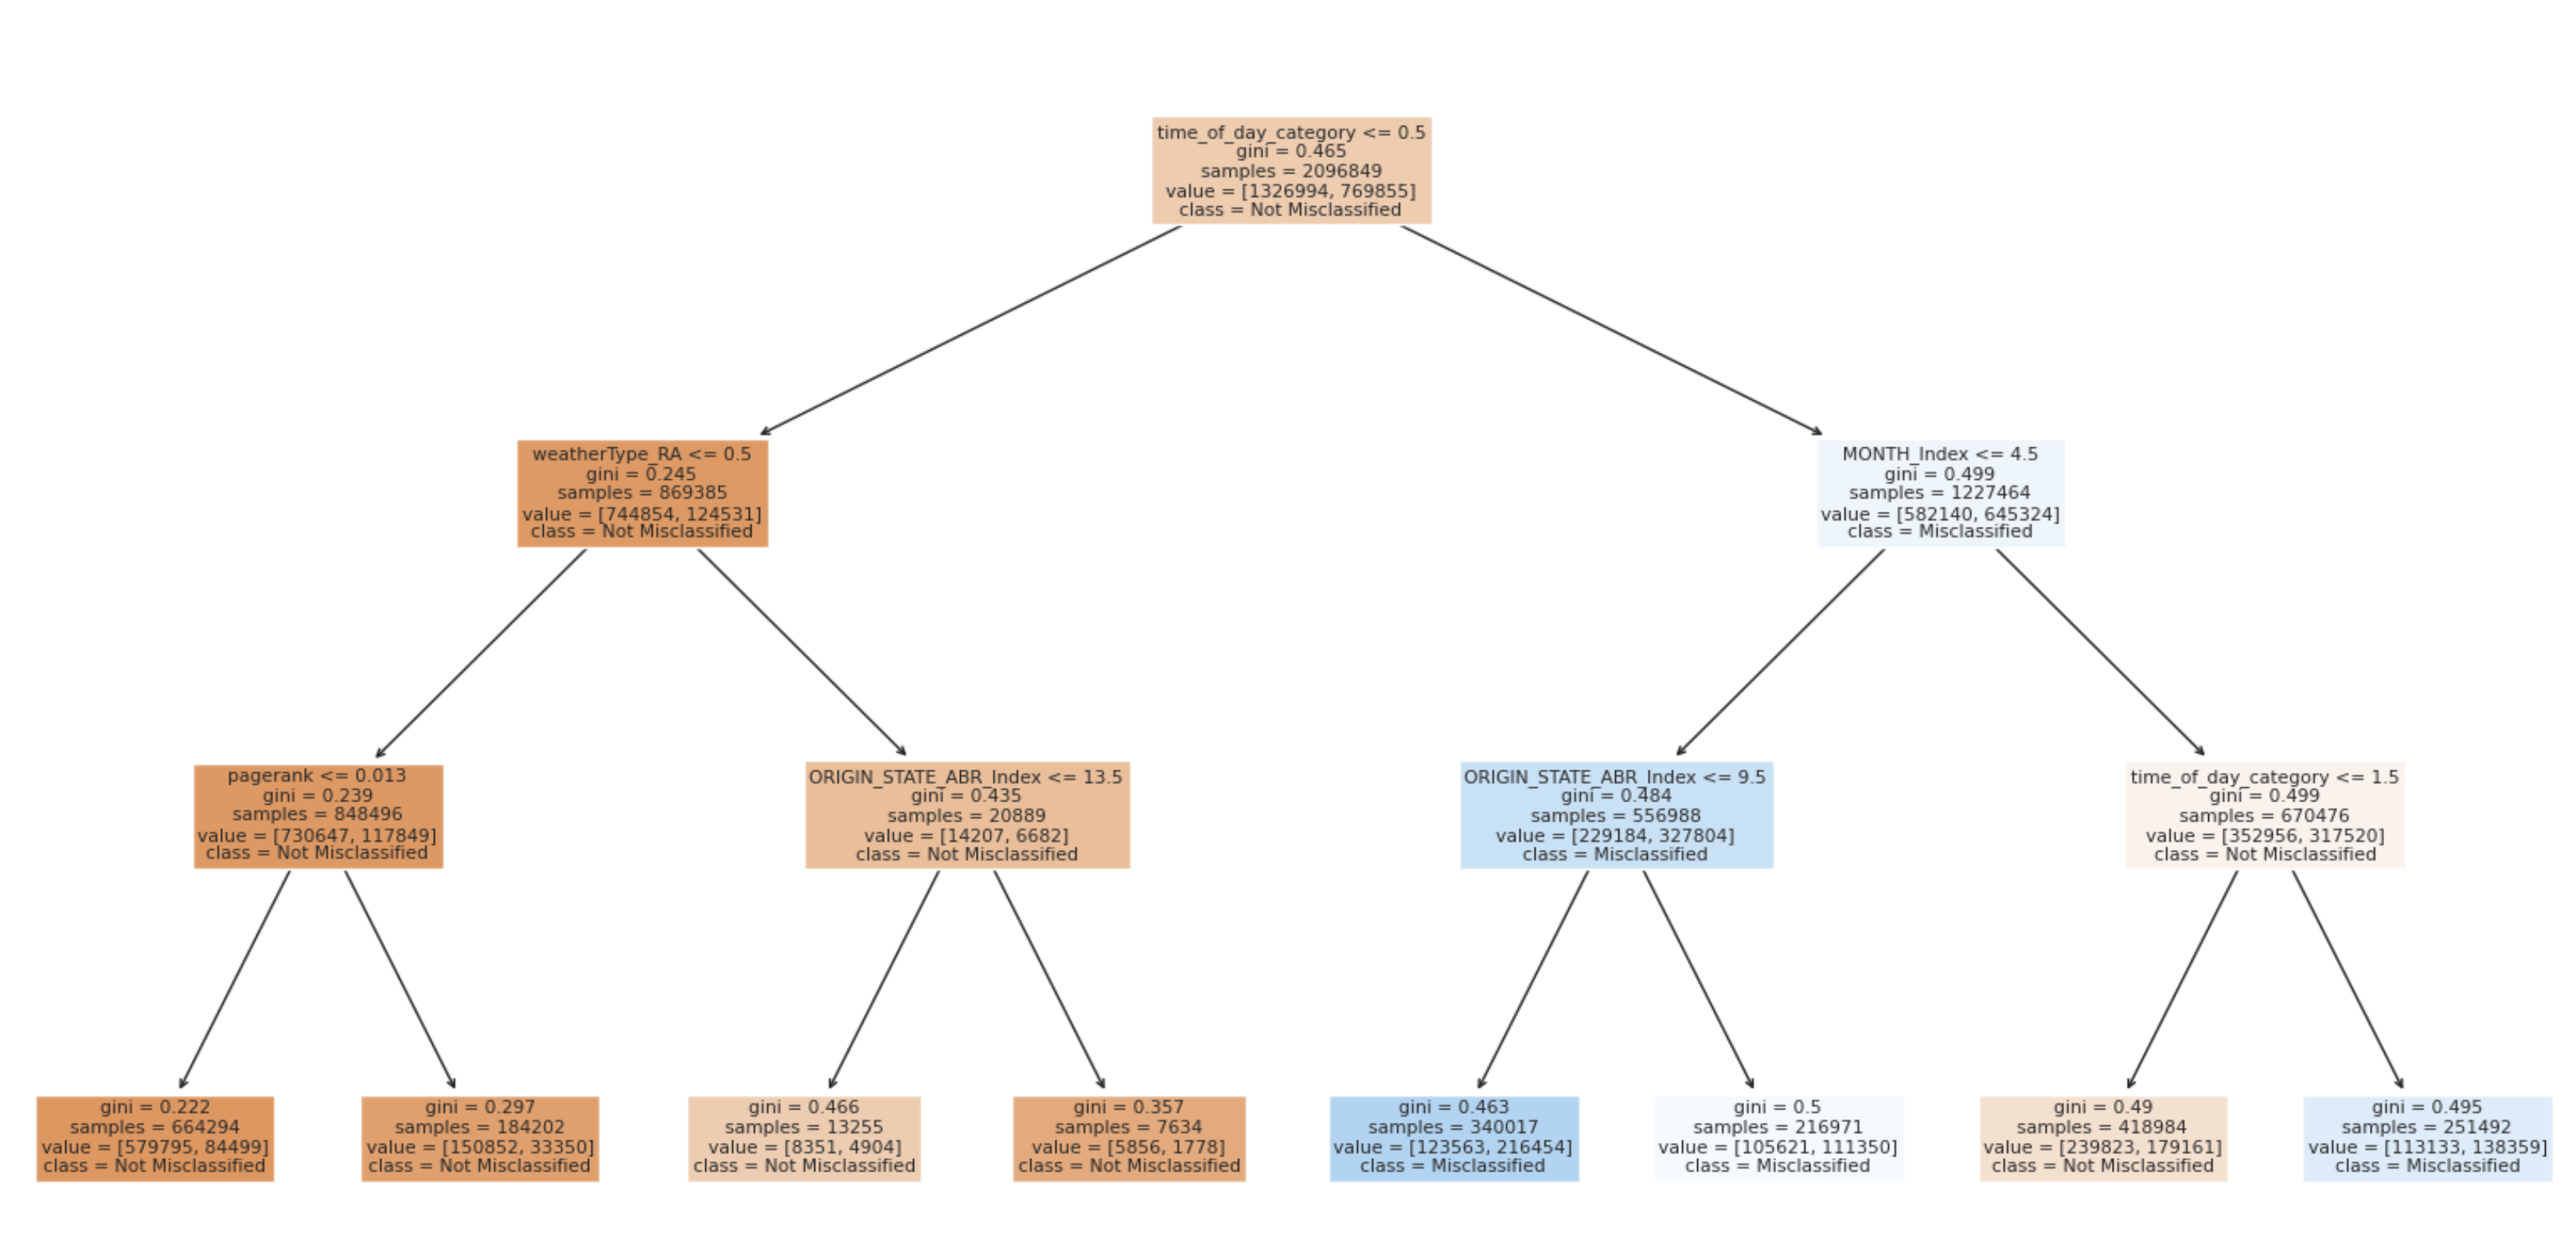

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/nathanarias@berkeley.edu/Screenshot 2024-04-19 at 6.41.08 PM.png'
display(Image(filename=image_path, height = 700, width =1500))

#### The Error-Specific Decision Tree

**Results:**
For interpretablilty and readability, we limited this first misclassification tree to 4 layers but could expand this analysis to further layers to understand more fine grain logic that our model imposes. In this decision tree, we are looking at the instances of `False positive (Blue), False negative (Purple), True Negative (Green), and True Positive (Orange)` : 

1) Layer 1: `Time of Day`
2) Layer 2: `Weather Type - Snow` , `Month`
3) Layer 3: `Weather Type - Rain`, `Hourly Pressure Tendency`, `Originating Flight State`, `Time of Day`
4) Layer 4: `Destination ICAO Code`, `PageRank`, `Originating Flight State`,`Hourly Wind Direction`,`Weather Type - Rain`, `Sky Conditions`
5) Similar to layer 4

Note on format differences: Due to the large size of the decision tree, to maximize readiblity, the decision tree rules were imported to ChatGPT:Diagrams and Data GPT which constructed a decision tree using Miro, a board editor. `The tree has been split into left and right segments following the Time of day split`, we will outline the results below by left and right branch. 

**Left Side of Decision Tree**


With now a finer level of granularity with the type of mistakes or successful labeling we are achieving with our model, we can now see that `Time of day <=0.5 AKA Morning` does play a significant role in our misidentification of labels to `false positive`. If we travel down the left branch which is split by the time of day equal to `morning` we can see we only see instances of false positves when ` weather_type_SN > 0.5 AKA snow`. This left branch performs quite well, and follows an intuitive methodology for identifying delays by looking at the time of day, snowy weather conditions, rain and or pressure index, finally looking how busy the airport is by accessing the pagerank value.

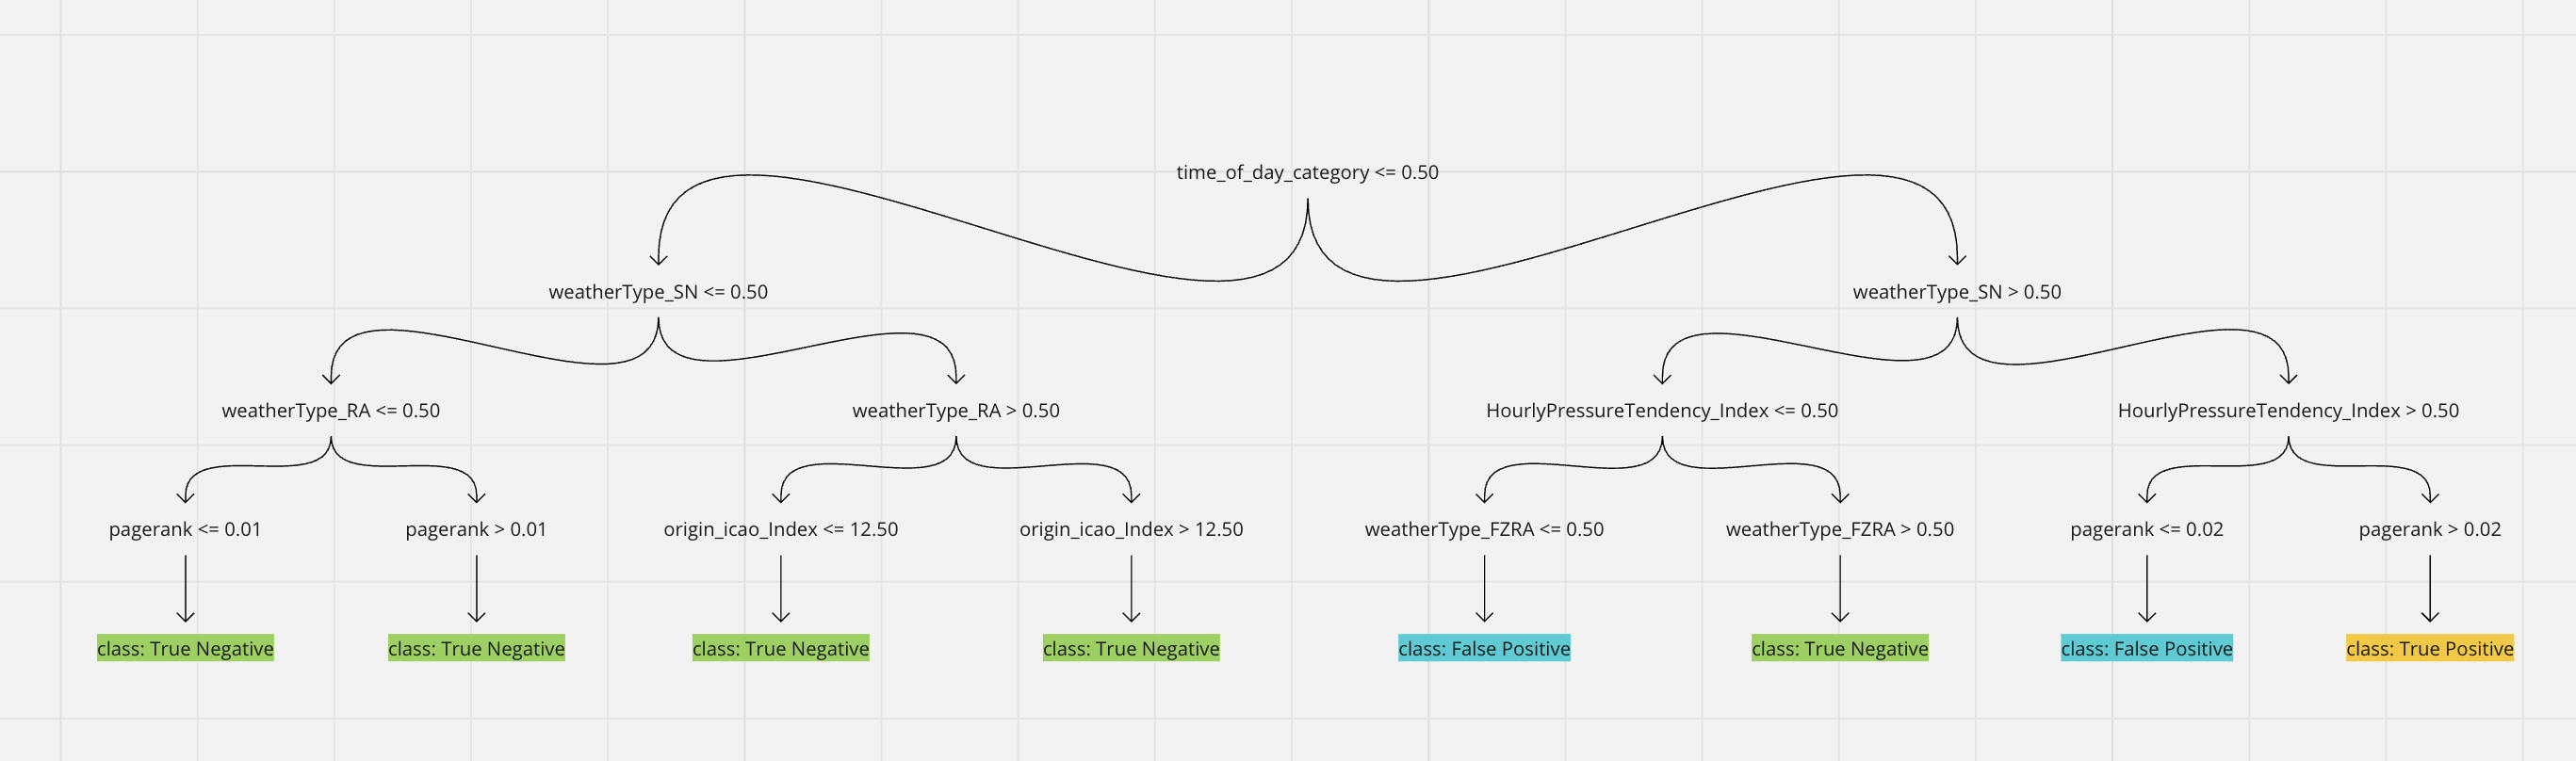

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/nathanarias@berkeley.edu/Screenshot 2024-04-20 at 10.41.02 AM.png'
display(Image(filename=image_path))

**Right Side of Decision Tree**

The right side of the decision tree which contains, afternoon and evening flights have a more difficult time identifying delays. As we can see, almost all outcomes lead to false positive assessments. As a caveat, we understand that we are labeling the majority class within the final terminal nodes and are limited by the depth of our tree. 
Interesting, the weather conditions found in the left branch from the primary node are not found on this right branch. Instead, month index seems to be leveraged as a proxy for weather conditions.

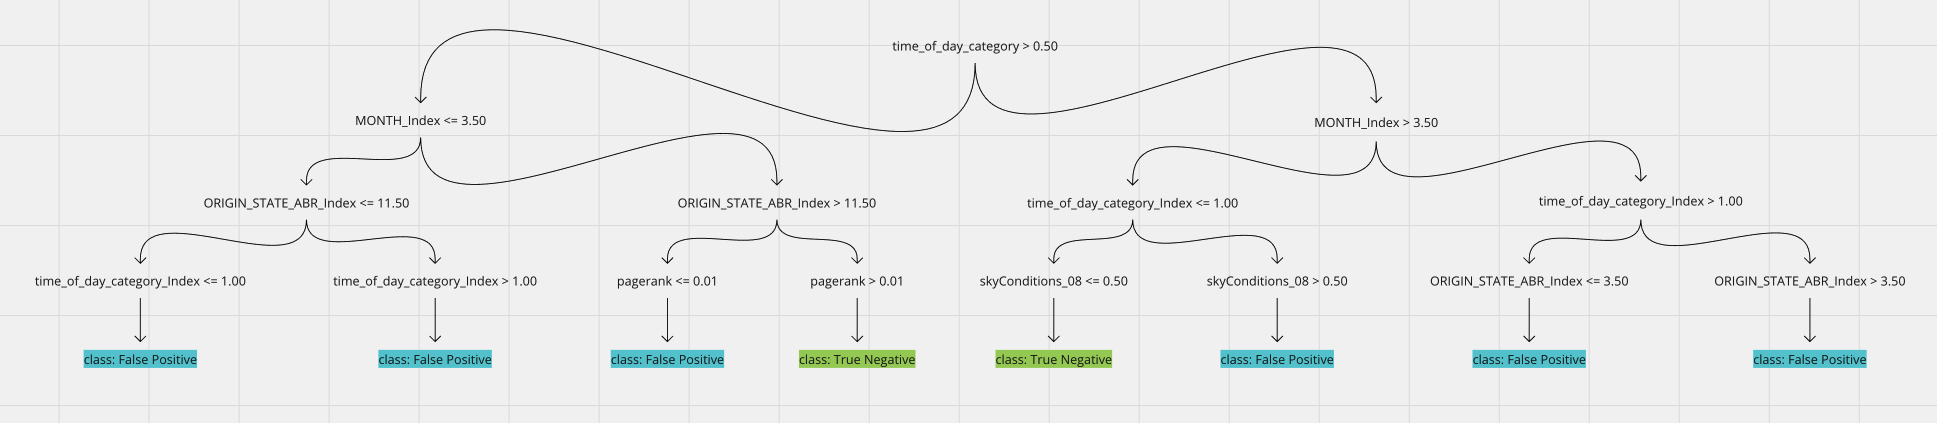

In [0]:
from IPython.display import display, Image

image_path = '/Workspace/Users/nathanarias@berkeley.edu/Screenshot 2024-04-20 at 10.49.53 AM.png'
display(Image(filename=image_path,))

## Final Thoughts

1) **Improving Feature Selection and Engineering:** Our findings suggest that enhancing feature selection and engineering could significantly impact model precision. A more refined approach in how features like weather conditions, time indices, and operational metrics are utilized and interpreted by the model may lead to better discrimination between delay and no-delay instances. Removing categorical variables such as time of day might force our model to look at the finer details in weather patterns instead of making broad judgments based off categories such as time of day.
2) **Adjusting Model Parameters and Techniques:** Tweaking model parameters and potentially incorporating advanced machine learning techniques like ensemble methods or neural networks might offer improvements. These methods could provide a more robust framework for handling complex patterns and class imbalances, which seem to be a prevailing issue in our current setup.

In conclusion, our detailed analysis has laid a strong foundation for targeted improvements in our flight delay notification system. By continuing to refine our methods and harnessing advanced analytics, we aim to significantly enhance the precision and reliability of our service, thereby improving passenger experience and operational efficiency.

#Final Conclusions and Future Directions

In summary, an "early-warning" system for flight delays greater than 15 minutes is quite feasible given the results of this project's experiments, and it is our hope that these results will be used to inform future starting points for any other models that seek to solve this problem.

Over the course of multiple rounds of testing on four different architectures, we gleaned some very important conclusions: firstly, that flight delay data in general is often nonlinear and/or multidimensional in nature. This is very evident given the nonlinearities observable when plotting monthly delay metrics, and ultimately results in the need for implementing an equally nonlinear model, like a multilayer perceptron. Through this, we also discovered that feature selection processes need to be highly fine-tuned when creating predictive models for these types of problems. As was seen in the gap analysis above, an unrefined feature selection process can result in massive overfitting during the training phase, thus costing great leaps in model generalizability during testing. 

Future iterations on this project will revolve around further refining the multilayer perceptron model's architecture, the feature selection process, and the model output metrics. Depending on those results, it might also be reasonable to expand the dataset further. However, with the model's training phase on the 5-year dataset already taking ~4 hours, the need for this expansion should be heavily weighed alongside the total cost of a service capable of running model operations in Spark and in parallel, like Microsoft Azure.
